# Projeto 1 - Gabriel d'Agosto Pache de Faria - Turma 781

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>1
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padronização de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 07/02/2022;

- Monitoria Projeto 01: 16/02/2022 (possivelmente);

- Data de Entrega: 18/02/2022;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoAluno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

# Preparação dos Dados e Verificação de Consistência

Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

In [1]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import custom libraries
from libs import utils 
from functools import partial


In [2]:
N_JOBS = 8 # Change here depending on CPU threads
RANDOM_STATE = 42
plt.style.use('ggplot')
color_palette = sns.color_palette("muted", 10)

#Sumindo com o erro do loc
pd.options.mode.chained_assignment = None


In [3]:
# import dataset
df = pd.read_csv("./datasets/COVID.csv", index_col=0)
df_fixed = df.copy()


In [4]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sex,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
patient_type,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
intubed,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pneumonia,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
age,27.0,24.0,54.0,30.0,60.0,47.0,63.0,56.0,41.0,39.0,46.0,45.0,28.0,34.0,38.0,34.0,49.0,46.0,39.0,63.0
pregnancy,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN
diabetes,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
copd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asthma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
inmsupr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [6]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,499692.000000,499692.000000,107424.000000,499681.000000,499692.000000,245258.000000,498051.000000,498246.000000,498250.000000,498030.000000,498203.000000,497499.000000,498183.000000,498222.000000,498216.000000,498113.000000,346017.000000,499692.000000,107423.000000
mean,0.493492,0.784775,0.084739,0.157533,42.545942,0.014736,0.125186,0.016610,0.032542,0.016206,0.163267,0.030939,0.022921,0.164443,0.020110,0.086235,0.569238,0.441586,0.083865
std,0.499958,0.410978,0.278494,0.364302,16.640391,0.120492,0.330930,0.127806,0.177434,0.126267,0.369609,0.173152,0.149653,0.370677,0.140376,0.280712,0.495184,0.496577,0.277186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Tratando Missing

In [7]:
# Missing percentages
(df.isna()).sum() * 100 / len(df)


sex                     0.000000
patient_type            0.000000
intubed                78.501957
pneumonia               0.002201
age                     0.000000
pregnancy              50.918166
diabetes                0.328402
copd                    0.289378
asthma                  0.288578
inmsupr                 0.332605
hypertension            0.297984
other_disease           0.438870
cardiovascular          0.301986
obesity                 0.294181
renal_chronic           0.295382
tobacco                 0.315995
contact_other_covid    30.753944
covid_res               0.000000
icu                    78.502157
dtype: float64

### Pregnancy

Primeiro, vamos começar analisando a coluna pregnancy. Nota-se que cerca de 50,9% dos dados de pregnancy estão nulos. Isso pode ocorrer pelo fato de que não foi preenchido o campo para pacientes homens (que representariam cerca de metade das linhas). Vamos verificar se a hipótese é verdadeira.

In [8]:
# Verificando quantos dados tem intubed mas não tem icu
print('total de pregnancy NaN:', df[(df['pregnancy'].isna())].index.size)

print('homens com pregnancy NaN:', df[(df['sex'] == 0) & (df['pregnancy'].isna())].index.size)
print('homens com pregnancy preenchida:', df[(df['sex'] == 0) & (df['pregnancy'].notna())].index.size)

print('mulheres com pregnancy NaN:', df[(df['sex'] == 1) & (df['pregnancy'].isna())].index.size)
print('mulheres com pregnancy preenchida:', df[(df['sex'] == 1) & (df['pregnancy'].notna())].index.size)

total de pregnancy NaN: 254434
homens com pregnancy NaN: 253098
homens com pregnancy preenchida: 0
mulheres com pregnancy NaN: 1336
mulheres com pregnancy preenchida: 245258


Podemos resolver os problemas dos pacientes homens, preenchendo os dados com 0. Para as mulheres, mais análise é necessária.

In [9]:
df[df['sex'] == 1]['pregnancy'].value_counts()

0.0    241644
1.0      3614
Name: pregnancy, dtype: int64

Podemos então concluir que, dado a quantidade de mulheres grávidas e quantidade de mulheres não grávidas, podemos preencher todos os dados faltantes como sendo 0.

In [10]:
df_fixed['pregnancy'] = df['pregnancy'].fillna(0)

### Contact Other Covid

In [11]:
df['contact_other_covid'].value_counts(dropna=False, normalize=True)

1.0    0.394175
NaN    0.307539
0.0    0.298286
Name: contact_other_covid, dtype: float64

Dessa vez, temos uma distribuição muito parecida dos dados. Vamos verificar se existe alguma outra coluna que tem alguma correlação com esta coluna, para nos ajudar a preencher os dados. 

In [12]:
df_contact_na = df[df['contact_other_covid'].notna()]
change_boolean_col = partial(utils.change_df_boolean,df_contact_na)

change_boolean_col('sex', ['Male', 'Female'])
change_boolean_col('patient_type', ['Hospitalized', 'Sent Home'])

col_names = ['pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
             'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res']

for col in col_names:
    change_boolean_col(col)


<ipython-input-15-869d2392d31a>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


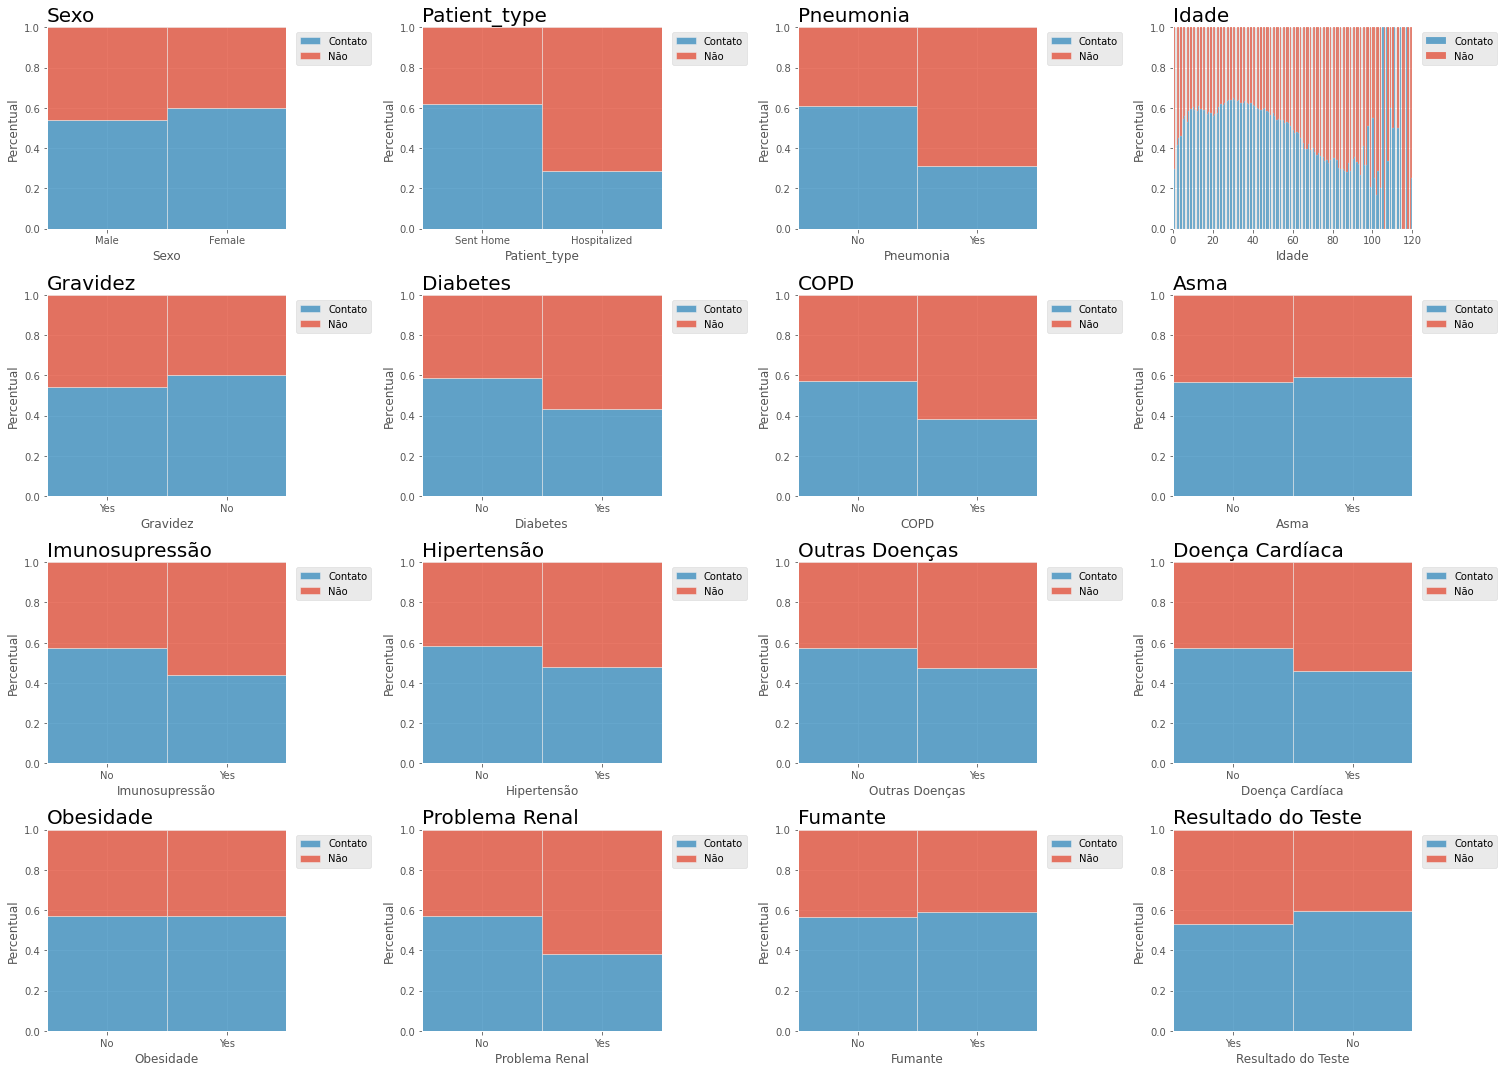

In [15]:
fig, axs = utils.cria_fig_ax(ncols=4,nrows=4, figsize=(21, 15))

plot_histogram = partial(utils.boolean_hist_plot,df_contact_na, 'contact_other_covid',['Contato','Não'])

plot_histogram('sex', axs[0][0], 'Sexo')
plot_histogram('patient_type', axs[0][1], 'Patient_type')
plot_histogram('pneumonia', axs[0][2], 'Pneumonia')
plot_histogram('age', axs[0][3], 'Idade')
plot_histogram('pregnancy', axs[1][0], 'Gravidez')
plot_histogram('diabetes', axs[1][1], 'Diabetes')
plot_histogram('copd', axs[1][2], 'COPD')
plot_histogram('asthma', axs[1][3], 'Asma')
plot_histogram('inmsupr', axs[2][0], 'Imunosupressão')
plot_histogram('hypertension', axs[2][1], 'Hipertensão')
plot_histogram('other_disease', axs[2][2], 'Outras Doenças')
plot_histogram('cardiovascular', axs[2][3], 'Doença Cardíaca')
plot_histogram('obesity', axs[3][0], 'Obesidade')
plot_histogram('renal_chronic', axs[3][1], 'Problema Renal')
plot_histogram('tobacco', axs[3][2], 'Fumante')
plot_histogram('covid_res', axs[3][3], 'Resultado do Teste')



fig.tight_layout()
fig.show()


Não conseguimos encontrar nenhuma coluna que poderia nos ajudar a preencher os dados do contact other covid. Portanto, vamos criar uma nova categoria para representar os dados faltantes. Para tal, vamos criar uma nova coluna, chamada contact_other_covid_unknown e salvar os dados do isna la, e vamos preencher todos os dados faltantes com 0. Criando assim um 'get_dummies' a partir das colunas contact_other_covid e contact_other_covid_unknown

In [ ]:
df_fixed['contact_other_covid_unknown'] = np.where(df['contact_other_covid'].isna(),1.0,0.0)
df_fixed['contact_other_covid'] = df['contact_other_covid'].fillna(0)


### ICU & Intubed

Nota-se que as duas colunas com maior numero de faltantes são __icu__ e __intubed__. Seus percentuais de faltantes são quase identicos. Portanto, vamos comparar as colunas e ver se os dados que faltam se encontram nos mesmos indices, ou se não há correlação entre o NaN em uma coluna e o NaN em outra coluna.

In [ ]:
# Verificando quantos dados tem intubed mas não tem icu
print('tem intubed mas não tem icu:', df[(df['icu'].isna()) & (df['intubed'].notna())].index.size)

# Verificando quantos dados tem icu mas não tem intubed
print('tem icu mas não tem intubed:', df[(df['intubed'].isna()) & (df['icu'].notna())].index.size)


tem intubed mas não tem icu: 1
tem icu mas não tem intubed: 0


Notamos que, a partir dos dados acima, com a exceção de um caso, todos os pacientes com dados faltantes de intubed tambem tem dados faltantes de icu. 

Vamos agora procurar outras colunas que podem ter correlação com os dados faltantes. Para isso, vamos filtrar apenas as colunas cujos dados de icu e intubed estejam faltando, e ver se encontramos alguma outra informação que nos ajude a preencher os dados faltantes.

In [ ]:
df_icu_intubed = df.copy()
df_icu_intubed['icu_intubed_unknown'] = (df['icu'].isna() & df['intubed'].isna())
change_boolean_col = partial(utils.change_df_boolean, df_icu_intubed)

change_boolean_col('sex', ['Male', 'Female'])
change_boolean_col('patient_type', ['Hospitalized', 'Sent Home'])

col_names = ['pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
             'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'covid_res']

for col in col_names:
    change_boolean_col(col)


<ipython-input-56-77850d2ac3d5>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


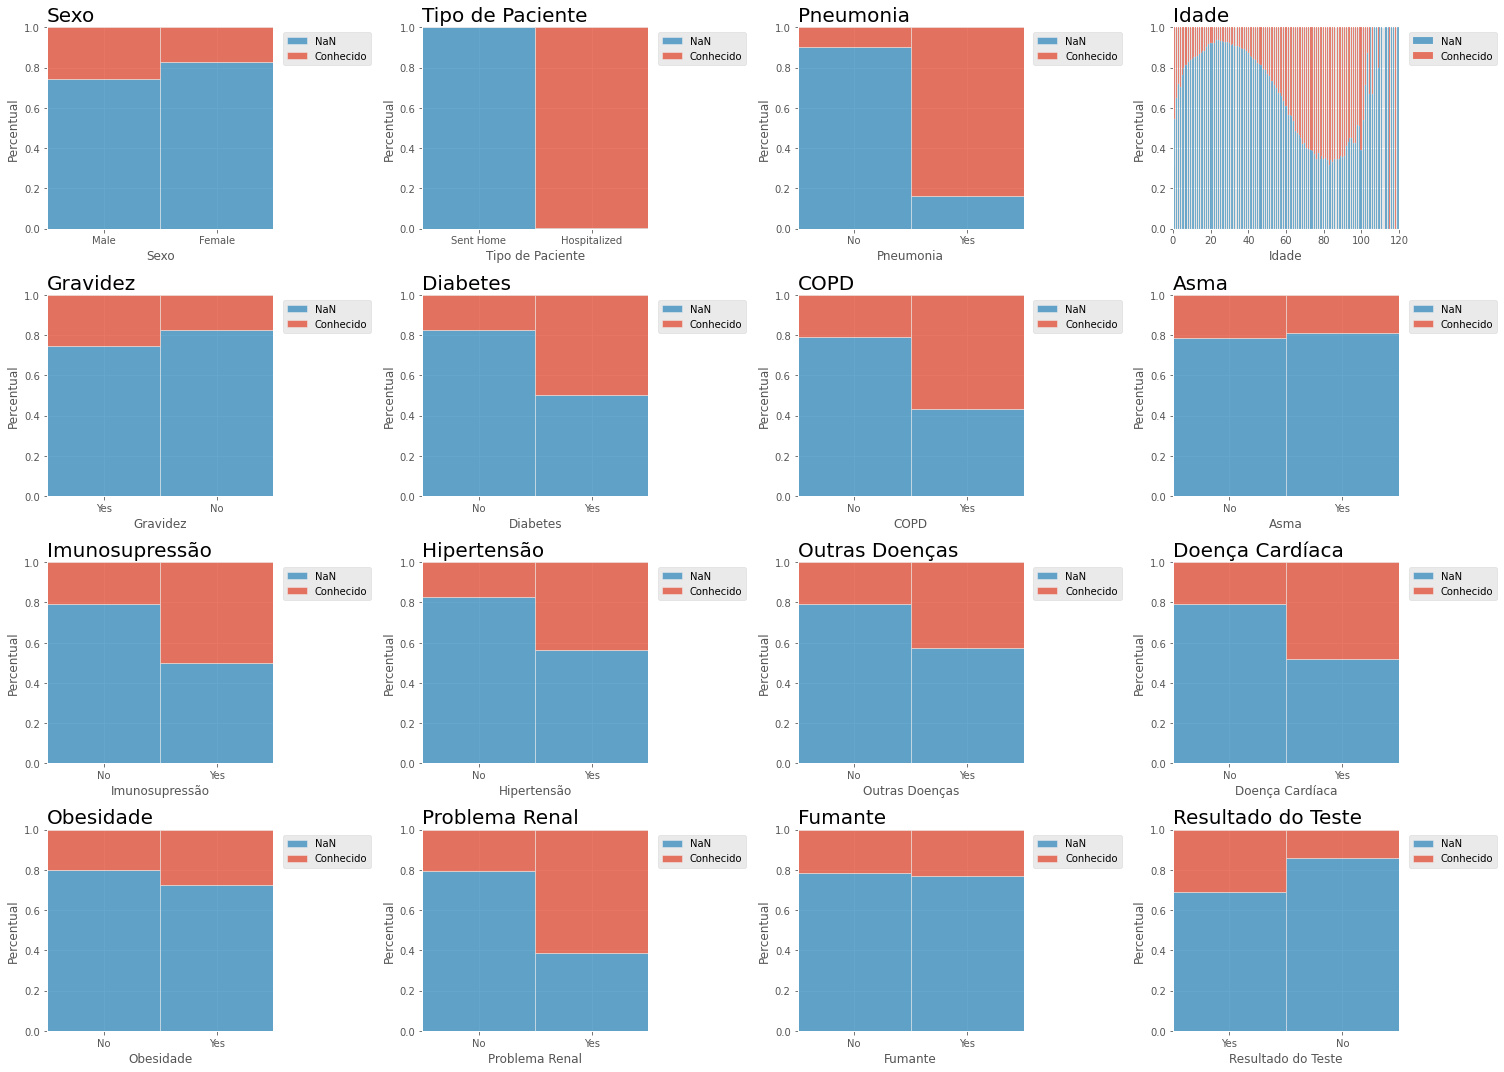

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(21, 15))
fig.subplots_adjust(wspace=0.2, hspace=0.3)

plot_histogram = partial(utils.boolean_hist_plot,df_icu_intubed,'icu_intubed_unknown',['NaN','Conhecido'])

plot_histogram('sex', axs[0][0], 'Sexo')
plot_histogram('patient_type', axs[0][1], 'Tipo de Paciente')
plot_histogram('pneumonia', axs[0][2], 'Pneumonia')
plot_histogram('age', axs[0][3], 'Idade')
plot_histogram('pregnancy', axs[1][0], 'Gravidez')
plot_histogram('diabetes', axs[1][1], 'Diabetes')
plot_histogram('copd', axs[1][2], 'COPD')
plot_histogram('asthma', axs[1][3], 'Asma')
plot_histogram('inmsupr', axs[2][0], 'Imunosupressão')
plot_histogram('hypertension', axs[2][1], 'Hipertensão')
plot_histogram('other_disease', axs[2][2], 'Outras Doenças')
plot_histogram('cardiovascular', axs[2][3], 'Doença Cardíaca')
plot_histogram('obesity', axs[3][0], 'Obesidade')
plot_histogram('renal_chronic', axs[3][1], 'Problema Renal')
plot_histogram('tobacco', axs[3][2], 'Fumante')
plot_histogram('covid_res', axs[3][3], 'Resultado do Teste')


fig.tight_layout()
fig.show()


Vemos no gráfico acima que existe uma grande correlação entre o patient type e os dados missing. Percebemos que, em sua maioria, os pacientes que não tem dados de icu e entubação são os que foram mandados para casa, o que não se repete nos pacientes com dados conhecidos.
Vamos fazer mais algumas verificações para garantir que nossa hipótese está correta.

In [ ]:
#Pacientes enviados para casa tem dados desconhecidos de ICU?
print('Pacientes Sent Home, dados desconhecidos?')
print(df_icu_intubed[df_icu_intubed['patient_type'] == 'Sent Home']['icu_intubed_unknown'].value_counts())

print(' ')

#Pacientes hospitalizados tem dados desconhecidos de ICU?
print('Pacientes Hospitalized, dados desconhecidos?')
print(df_icu_intubed[df_icu_intubed['patient_type'] == 'Hospitalized']['icu_intubed_unknown'].value_counts())


Pacientes Sent Home, dados desconhecidos?
True    392146
Name: icu_intubed_unknown, dtype: int64
 
Pacientes Hospitalized, dados desconhecidos?
False    107424
True        122
Name: icu_intubed_unknown, dtype: int64


In [ ]:
# Para os dados conhecidos, quantos foram para casa e quantos foram hospitalizados
print('Dados conhecidos, estado dos pacientes')
print(df_icu_intubed[df_icu_intubed['icu_intubed_unknown'] == False]['patient_type'].value_counts())
print(' ')

# Para os dados desconhecidos, quantos foram para casa e quantos foram hospitalizados
print('Dados desconhecidos, estado dos pacientes')
print(df_icu_intubed[df_icu_intubed['icu_intubed_unknown'] == True]['patient_type'].value_counts())
print(' ')


Dados conhecidos, estado dos pacientes
Hospitalized    107424
Name: patient_type, dtype: int64
 
Dados desconhecidos, estado dos pacientes
Sent Home       392146
Hospitalized       122
Name: patient_type, dtype: int64
 


In [ ]:
# Para os dados conhecidos e Hospitalized, quantos foram para ICU e quantos foram entubados
print(df_icu_intubed[(df_icu_intubed['icu_intubed_unknown'] == False) & (df_icu_intubed['patient_type'] == 'Hospitalized')]['icu'].value_counts())


print(df_icu_intubed[(df_icu_intubed['icu_intubed_unknown'] == False) & (df['patient_type'] == 'Hospitalized')]['intubed'].value_counts())



0.0    98414
1.0     9009
Name: icu, dtype: int64
Series([], Name: intubed, dtype: int64)


Vemos que mesmo entre os pacientes hospitalizados, o numero de pacientes que foram para icu e pacientes entubados são menos de 10%. Portanto, vamos concluir que podemos preencher os dados de icu e intubed como 0, independente do patient_type

In [ ]:
df_fixed['icu'] = df['icu'].fillna(0)
df_fixed['intubed'] = df['intubed'].fillna(0)

In [ ]:
df_fixed.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sex,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
patient_type,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
intubed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pneumonia,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
age,27.0,24.0,54.0,30.0,60.0,47.0,63.0,56.0,41.0,39.0,46.0,45.0,28.0,34.0,38.0,34.0,49.0,46.0,39.0,63.0
pregnancy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diabetes,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
copd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asthma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
inmsupr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(df_fixed.isna()).sum() * 100 / len(df)


sex                            0.000000
patient_type                   0.000000
intubed                        0.000000
pneumonia                      0.002201
age                            0.000000
pregnancy                      0.000000
diabetes                       0.328402
copd                           0.289378
asthma                         0.288578
inmsupr                        0.332605
hypertension                   0.297984
other_disease                  0.438870
cardiovascular                 0.301986
obesity                        0.294181
renal_chronic                  0.295382
tobacco                        0.315995
contact_other_covid            0.000000
covid_res                      0.000000
icu                            0.000000
contact_other_covid_unknown    0.000000
dtype: float64

### Outros dados

Vamos agora analisar as colunas com pouco dados faltantes. São elas:
- pneumonia
- diabetes
- copd
- asthma
- inmsupr
- hypertension
- other_disease
- cardiovascular
- obesity
- renal_chronic
- tobacco

In [ ]:
df['pneumonia'].value_counts(normalize=True,dropna=False)

0.0    0.842449
1.0    0.157529
NaN    0.000022
Name: pneumonia, dtype: float64

In [ ]:
df['diabetes'].value_counts(normalize=True,dropna=False)

0.0    0.871941
1.0    0.124775
NaN    0.003284
Name: diabetes, dtype: float64

In [ ]:
df['copd'].value_counts(normalize=True,dropna=False)

0.0    0.980544
1.0    0.016562
NaN    0.002894
Name: copd, dtype: float64

In [ ]:
df['asthma'].value_counts(normalize=True,dropna=False)

0.0    0.964666
1.0    0.032448
NaN    0.002886
Name: asthma, dtype: float64

In [ ]:
df['inmsupr'].value_counts(normalize=True,dropna=False)

0.0    0.980522
1.0    0.016152
NaN    0.003326
Name: inmsupr, dtype: float64

In [ ]:
df['hypertension'].value_counts(normalize=True,dropna=False)

0.0    0.83424
1.0    0.16278
NaN    0.00298
Name: hypertension, dtype: float64

In [ ]:
df['other_disease'].value_counts(normalize=True, dropna=False)


0.0    0.964808
1.0    0.030803
NaN    0.004389
Name: other_disease, dtype: float64

In [ ]:
df['cardiovascular'].value_counts(normalize=True, dropna=False)


0.0    0.974128
1.0    0.022852
NaN    0.003020
Name: cardiovascular, dtype: float64

In [ ]:
df['obesity'].value_counts(normalize=True, dropna=False)


0.0    0.833099
1.0    0.163959
NaN    0.002942
Name: obesity, dtype: float64

In [ ]:
df['renal_chronic'].value_counts(normalize=True, dropna=False)


0.0    0.976996
1.0    0.020050
NaN    0.002954
Name: renal_chronic, dtype: float64

In [ ]:
df['tobacco'].value_counts(normalize=True, dropna=False)


0.0    0.910877
1.0    0.085963
NaN    0.003160
Name: tobacco, dtype: float64

Vemos que são todos dados com uma classe majoritária (negativa), e poucos dados faltantes. vamos preenchê-los com 0 (a moda)

In [ ]:
df_fixed.fillna(0, inplace=True)

In [ ]:
(df_fixed.isna()).sum() * 100 / len(df)


sex                            0.0
patient_type                   0.0
intubed                        0.0
pneumonia                      0.0
age                            0.0
pregnancy                      0.0
diabetes                       0.0
copd                           0.0
asthma                         0.0
inmsupr                        0.0
hypertension                   0.0
other_disease                  0.0
cardiovascular                 0.0
obesity                        0.0
renal_chronic                  0.0
tobacco                        0.0
contact_other_covid            0.0
covid_res                      0.0
icu                            0.0
contact_other_covid_unknown    0.0
dtype: float64

Terminamos assim o tratamento de dados faltantes

### Tratando dados duplicados

In [ ]:
df.duplicated().value_counts(normalize=True)


True     0.851052
False    0.148948
dtype: float64

Mais de 88% linhas apresentam alguma repetição. Vemos que, dado que a maioria dos dados é booleana, e não há nenhum dado identificador de cada paciente, a possibilidade de dois pacientes terem a mesma idade e os mesmos dados booleanos (visto que a maioria das classes booleanas tem uma moda clara) é muito grande. Não da pra dizer que os dados são duplicados. Podem perfeitamente serem duas pessoas diferentes. Portanto, vamos assumir que não há dados duplicados e que os dados 'duplicados' são na verdade duas pessoas com informações idênticas.

### Analise de Outliers

In [ ]:
df_fixed.describe()


,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,contact_other_covid_unknown
count,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000
mean,0.493492,0.784775,0.018217,0.157529,42.545942,0.007232,0.124775,0.016562,0.032448,0.016152,0.162780,0.030803,0.022852,0.163959,0.020050,0.085963,0.394175,0.441586,0.018029,0.307539
std,0.499958,0.410978,0.133736,0.364299,16.640391,0.084736,0.330464,0.127624,0.177187,0.126060,0.369165,0.172784,0.149432,0.370239,0.140173,0.280310,0.488673,0.496577,0.133057,0.461475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A unica coluna que não é booleana, variando de 0 a 1, é a coluna idade. Vamos então analisá-la

No handles with labels found to put in legend.
<ipython-input-84-6dfbf68af4a3>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


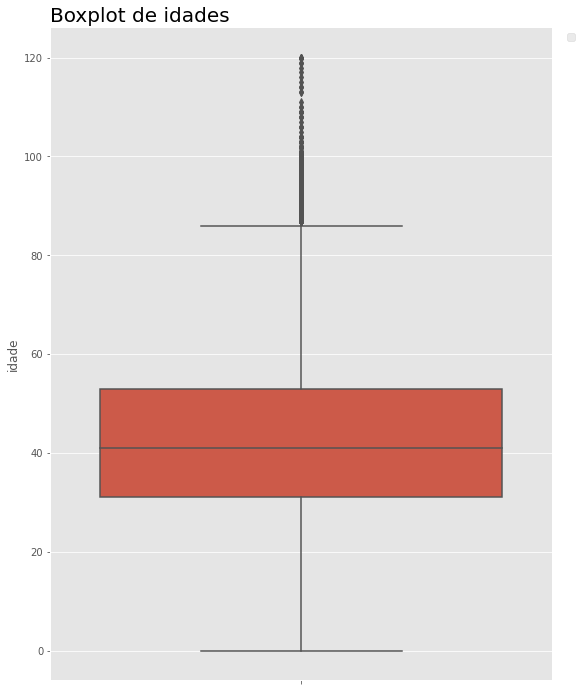

In [ ]:
fig, axs = utils.cria_fig_ax(figsize=(9,12))
sns.boxplot(data=df_fixed, y='age', ax=axs)
axs = utils.formata_grafico(axs, 'Boxplot de idades', ylabel='idade')
fig.show()

Lendo um pouco a respeito de idades, encontramos as seguintes informações:

<hr>

Link: https://en.wikipedia.org/wiki/List_of_the_oldest_living_people

" It is estimated that there are between 150 and 600 living people who have reached the age of 110."
O link tambem mostra que, hoje, há cerca de 50 pessoas vivas com mais de 112 anos. 

<hr>

Link: https://www.statista.com/statistics/996597/number-centenarians-worldwide/

O numero de pessoas com mais de 100 anos viva em 2015 era de mais de 400mil.

In [ ]:
df_fixed[df_fixed['age'] > 110].sort_values(by=['age'])

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,contact_other_covid_unknown
490613,0,1,0.0,0.0,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0
338127,0,1,0.0,0.0,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
477185,1,1,0.0,0.0,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0
86819,1,1,0.0,0.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0
330971,0,1,0.0,0.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0
293895,1,0,0.0,1.0,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
207152,0,1,0.0,0.0,116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
287439,1,1,0.0,0.0,117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0
251406,0,0,0.0,1.0,118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
14671,0,1,0.0,0.0,119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0


Vemos tambem que temos apenas 2 pessoas vivas no mundo com mais de 115 anos. Nenhuma atingiu 120 anos. Portanto, podemos dizer com uma confiança altissima que os dados de pessoas acima de 116 anos são dados preenchidos incorretamente.

In [ ]:
df_fixed = df_fixed[df_fixed['age'] < 115]


#### Idade de Grávidas

No handles with labels found to put in legend.
<ipython-input-91-c7228b3e7c67>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


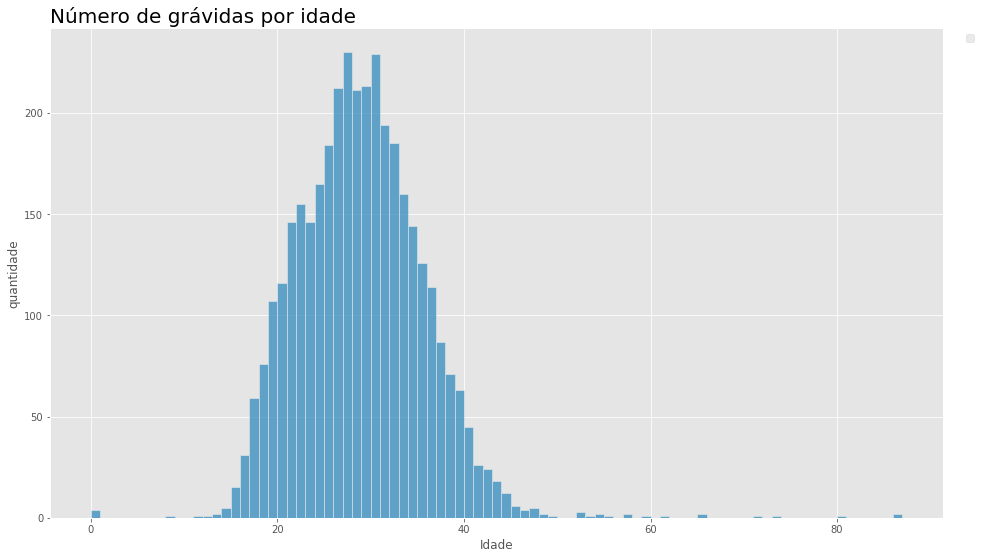

In [ ]:
df_pregnant = df_fixed[df_fixed['pregnancy'] == 1]
fig, axs = utils.cria_fig_ax()
sns.histplot(data=df_pregnant, x='age', binwidth=1, ax=axs)

axs = utils.formata_grafico(axs, 'Número de grávidas por idade', ylabel='quantidade', xlabel='Idade')

fig.show()


In [ ]:
#Pessoas novas
df_pregnant['age'].value_counts().sort_index().head()

0     4
8     1
11    1
12    1
13    2
Name: age, dtype: int64

In [ ]:
#Pessoas velhas
df_pregnant['age'].value_counts().sort_index().tail()

65    2
71    1
73    1
80    1
87    2
Name: age, dtype: int64

Link: https://en.wikipedia.org/wiki/Pregnancy_over_age_50

Vemos aqui que existem apenas 3 casos de mulheres acima de 70 anos grávidas.

<hr>

Link: https://en.wikipedia.org/wiki/List_of_youngest_birth_mothers

Vemos aqui que existem apenas 12 casos de mulheres abaixo de 9 anos grávidas.

<hr>

Portanto, vamos eliminar esses outliers acima e abaixo

In [ ]:
df_fixed = df_fixed[((df_fixed['pregnancy'] == 1 ) & (df_fixed['age'] < 70) & (df_fixed['age'] > 8)) | (df_fixed['pregnancy'] == 0)]

### Salvando como pickle

Finalizado o processo de preparação dos dados, vamos salvar o dataframe tratado em um arquivo pickle para poder utilizar posteriormente

In [ ]:
df_fixed.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,contact_other_covid_unknown
count,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.00000,499671.000000,499671.000000,499671.000000,499671.000000,499671.000000,499671.00000
mean,0.493487,0.784772,0.018218,0.157532,42.544308,0.007213,0.124776,0.016563,0.032449,0.016153,0.162783,0.030804,0.022853,0.16396,0.020051,0.085965,0.394187,0.441591,0.018030,0.30755
std,0.499958,0.410981,0.133739,0.364302,16.635984,0.084621,0.330465,0.127627,0.177190,0.126062,0.369168,0.172787,0.149435,0.37024,0.140176,0.280312,0.488676,0.496577,0.133059,0.46148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
#Como não há nenhuma coluna com valor < 0 ou valor > 255, podemos utilizar a menor medida, ubyte, para todos as colunas
df_fixed = df_fixed.astype('ubyte')
df_fixed.to_pickle('./datasets/dfCovid.pkl')


# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from libs import utils
from libs import lyrioChartingTools as lct
from functools import partial
import matplotlib.ticker as mtick


In [4]:
df = pd.read_pickle('./datasets/dfCovid.pkl')


### Idade

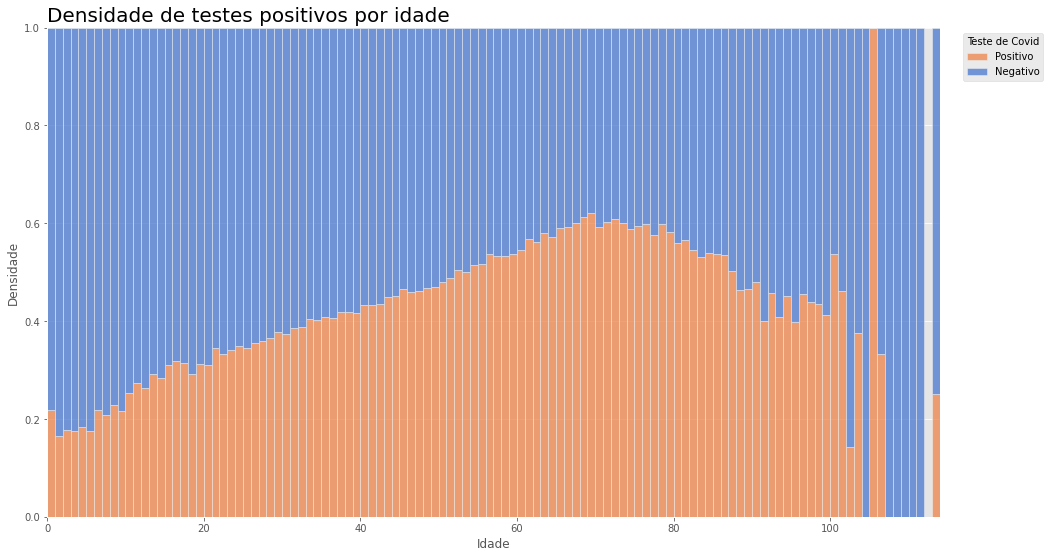

In [22]:
fig, axs = utils.cria_fig_ax()
sns.histplot(data=df, x='age', hue='covid_res',
             stat="probability", multiple="fill", ax=axs, binwidth=1, palette=color_palette[:2])
axs = utils.formata_grafico(axs, 'Densidade de testes positivos por idade', legenda=['Positivo','Negativo'],
                            ylabel='Densidade', xlabel='Idade', titulo_legenda='Teste de Covid')


<ipython-input-25-86a015672684>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


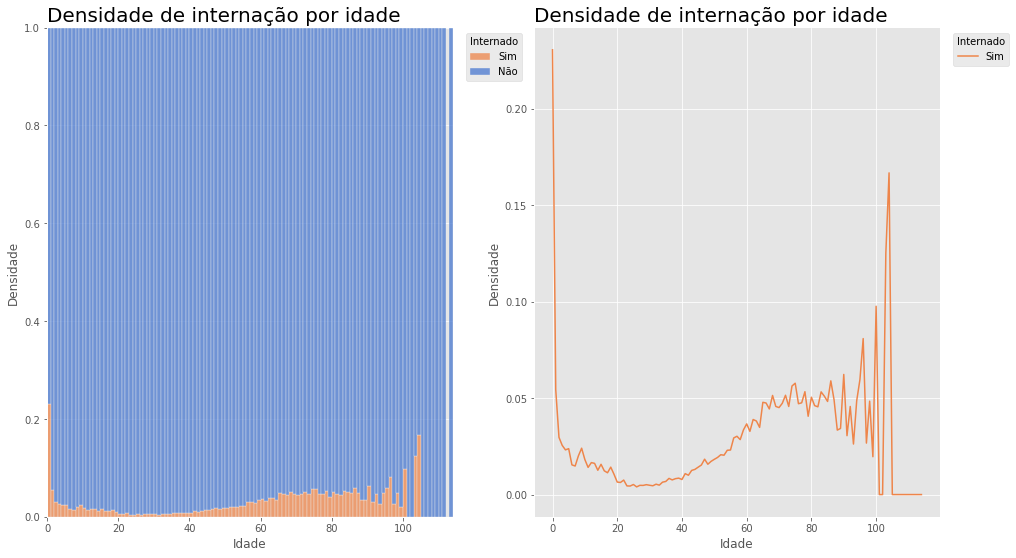

In [25]:
fig, axs = utils.cria_fig_ax(ncols=2)
sns.histplot(data=df, x='age', hue='icu',
             stat="probability", multiple="fill", ax=axs[0], binwidth=1,
             palette=color_palette[:2])
axs[0] = utils.formata_grafico(axs[0], 'Densidade de internação por idade',
                            ylabel='Densidade', xlabel='Idade', titulo_legenda='Internado', legenda=['Sim','Não'])

sns.lineplot(
    data=df[['age', 'icu']].groupby('age').agg('mean'),
    x='age',
    y='icu',
    ax=axs[1],
    color=color_palette[1]
)

axs[1] = utils.formata_grafico(axs[1], 'Densidade de internação por idade',
                            ylabel='Densidade', xlabel='Idade', titulo_legenda='Internado', legenda=['Sim', 'Não'])

fig.show()


Podemos observar que a probabilidade de internação tende a aumentar nos extremos. Pacientes muito jovens ou muito velhos tem maior chance de serem internados.

<ipython-input-29-acf8a4b65691>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


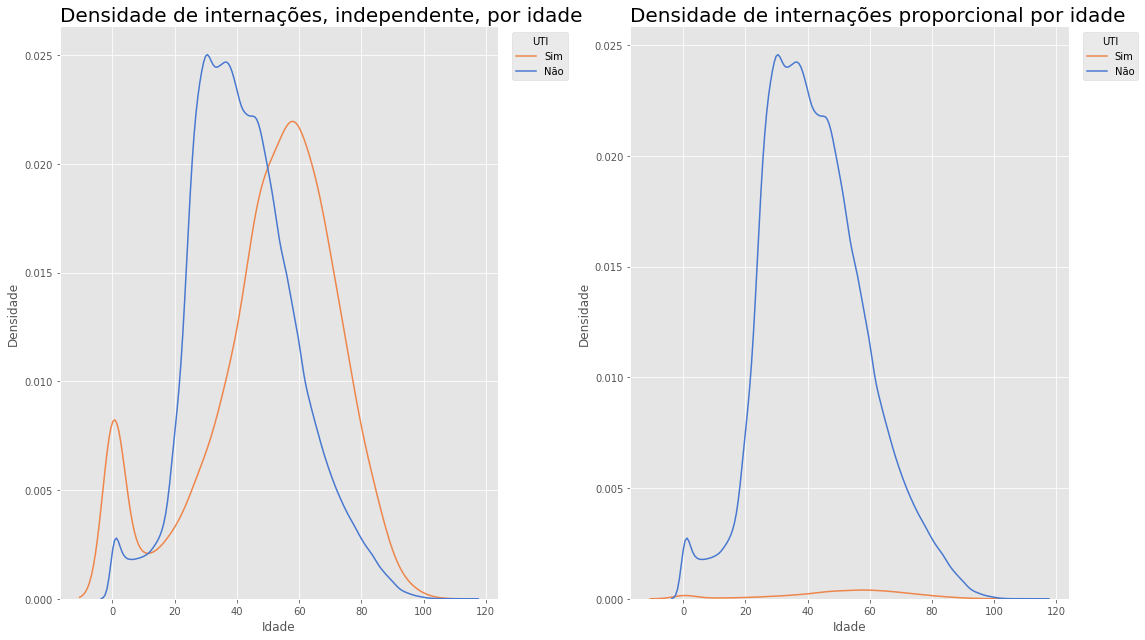

In [29]:
fig, axs = utils.cria_fig_ax(ncols=2)
sns.kdeplot(data=df, x='age', hue='icu',
            common_norm=False, ax=axs[0], palette=color_palette[:2])

sns.kdeplot(data=df, x='age', hue='icu',
            common_norm=True, ax=axs[1], palette=color_palette[:2])
axs[0] = utils.formata_grafico(axs[0], 'Densidade de internações, independente, por idade',
                            ylabel='Densidade', xlabel='Idade', titulo_legenda='UTI',legenda=['Sim','Não'])
axs[1] = utils.formata_grafico(axs[1], 'Densidade de internações proporcional por idade',
                            ylabel='Densidade', xlabel='Idade', titulo_legenda='UTI',legenda=['Sim','Não'])

fig.tight_layout()
fig.show()


Corroborando com o gráfico anterior, vemos que a maioria dos pacientes internados se encontram na faixa de 60 a 80 anos, enquanto que a maioria dos pacientes não internados estão na faixa de 20 a 60 anos

### Sexo

Novamente, vamos comparar a probabilidade de do resultado positivo por gênero, e da internação na UTI

<ipython-input-30-6ea1b7b9802b>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


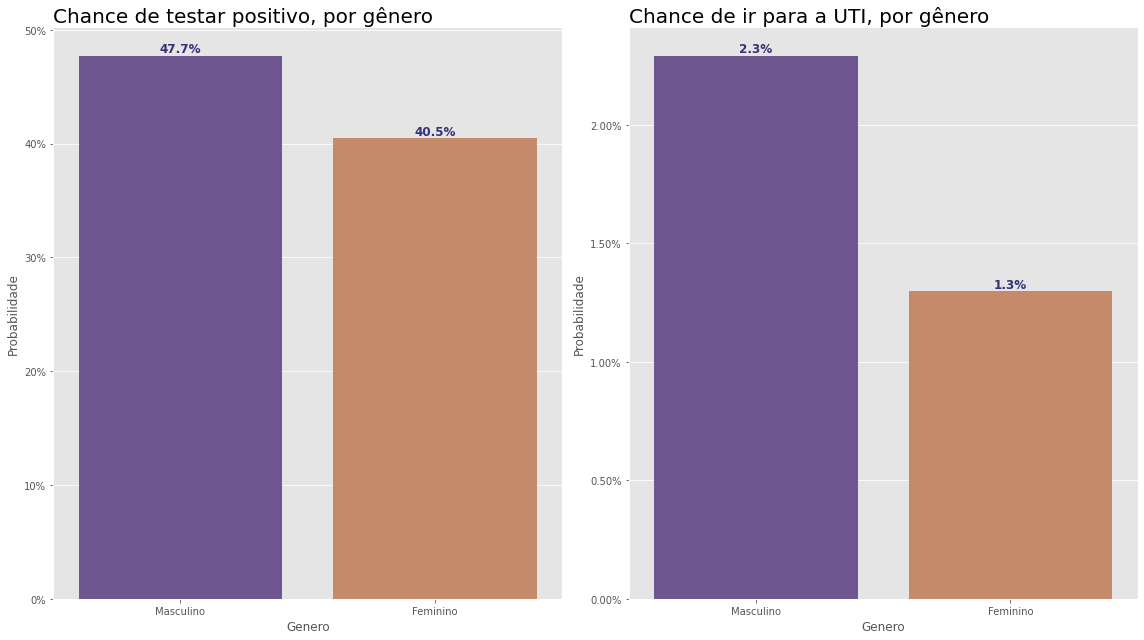

In [30]:
fig, ax = utils.cria_fig_ax(ncols=2)

gender_dict = {0:'Masculino', 1:'Feminino'}
gender_pallete = ['#6C4E97', '#D4855A']

plot_gender_chances = partial(lct.plot_chances,
    df=df, x='sex',
    tick_dict=gender_dict, pallete=gender_pallete)

plot_gender_chances(
    y='covid_res', ax=ax[0])

plot_gender_chances(
    y='icu', ax=ax[1])

lct.annotate_bar(ax[0],mode='percent')
lct.annotate_bar(ax[1],mode='percent')

formata_grafico_generos = partial(utils.formata_grafico, ylabel='Probabilidade',xlabel='Genero')

ax[0] = formata_grafico_generos(ax[0],titulo='Chance de testar positivo, por gênero')
ax[1] = formata_grafico_generos(ax[1],titulo='Chance de ir para a UTI, por gênero')

fig.tight_layout()
fig.show()


### Gravidez

<ipython-input-31-49a72ea4fa0b>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


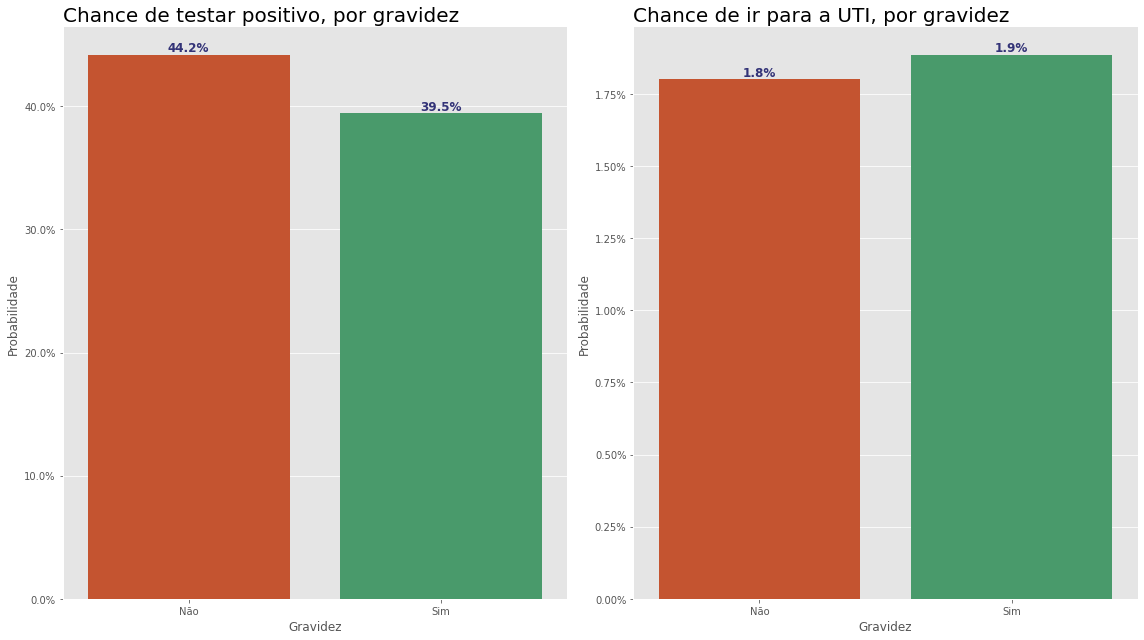

In [31]:
fig, ax = utils.cria_fig_ax(ncols=2)

yes_no_dict = {0: 'Não', 1: 'Sim'}
yes_no_pallete = ['#DD4817', '#3BA769']

plot_gender_chances = partial(lct.plot_chances,
                              df=df, x='pregnancy',
                              tick_dict=yes_no_dict, pallete=yes_no_pallete)

plot_gender_chances(
    y='covid_res', ax=ax[0])

plot_gender_chances(
    y='icu', ax=ax[1])

lct.annotate_bar(ax[0], mode='percent')
lct.annotate_bar(ax[1], mode='percent')

formata_grafico_generos = partial(
    utils.formata_grafico, ylabel='Probabilidade', xlabel='Gravidez')

ax[0] = formata_grafico_generos(
    ax[0], titulo='Chance de testar positivo, por gravidez')
ax[1] = formata_grafico_generos(
    ax[1], titulo='Chance de ir para a UTI, por gravidez')

fig.tight_layout()
fig.show()


Podemos ver que a gravidez reduz a chance de estar com covid, mas aumenta a probabilidade de ir para a UTI. Vamos avaliar se algum outro fator contribui para isso. Ou seja, há uma correlação, vamos verficiar agora se há uma causalidade. Para isso, vamos avaliar a idade das mulheres grávidas

<ipython-input-32-3e85db694152>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


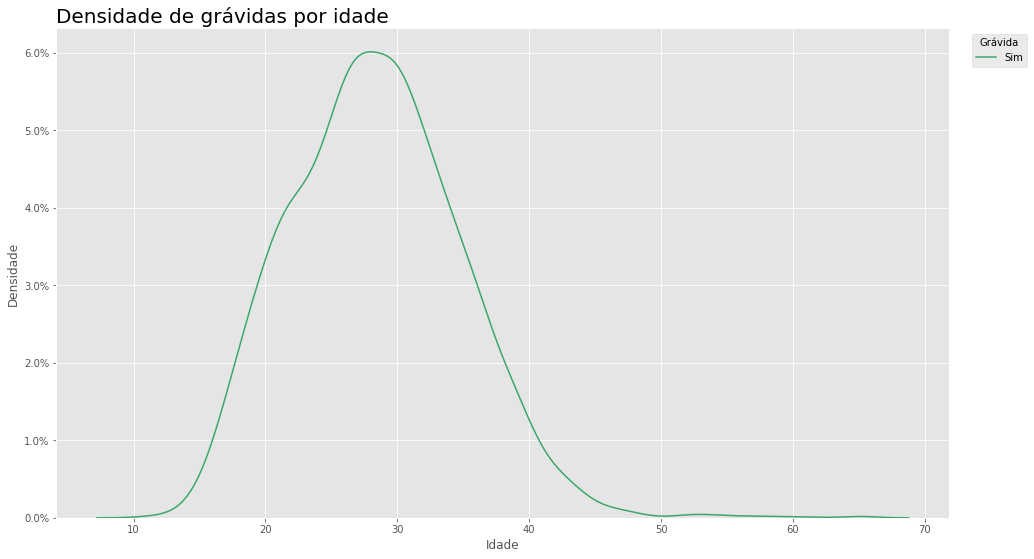

In [32]:
fig, ax = utils.cria_fig_ax()

sns.kdeplot(
    data=df[df['pregnancy'] == 1]['age'],
    ax=ax,
    color='#3BA769'
)

ax = utils.formata_grafico(ax, 'Densidade de grávidas por idade',
                               ylabel='Densidade', xlabel='Idade', titulo_legenda='Grávida', legenda=['Sim'])

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.show()


Vemos então que existe uma concentração grande de grávidas nas idades em que estabelecemos que o risco de testar positivo é menor. Portanto, não podemos concluir que a gravidez afeta as chances de testar positivo

### Pneumonia

Vamos agora testar a coluna pneumonia, que pode ser um indício forte de COVID, pois o COVID pode causar pneumonia

In [33]:
def plota_proba_teste_covid(df,x):
    fig, ax = utils.cria_fig_ax(figsize=(16,5), ncols=2)

    lct.plot_chances(df=df, x=x, y='covid_res',
                tick_dict=yes_no_dict, pallete=yes_no_pallete,
                ax=ax[0]
                )

    lct.annotate_bar(ax[0], mode='percent')

    sns.kdeplot(
        data=df,
        x='age',
        hue=x,
        ax=ax[1],
        palette=yes_no_pallete,
        common_norm = False
    )


    ax[0]=utils.formata_grafico(ax[0],ylabel='Probabilidade', xlabel=x, titulo=f'Probabilidade de testar positivo, por {x}')
    ax[1]=utils.formata_grafico(
        ax[1],
        ylabel='Densidade',
        xlabel=x,
        titulo=f'Distribuição de {x} por idade',
        legenda=['Sim','Não'], 
        titulo_legenda=x)

    fig.tight_layout()
    # fig.show()


plota_chances_teste = partial(plota_proba_teste_covid, df)


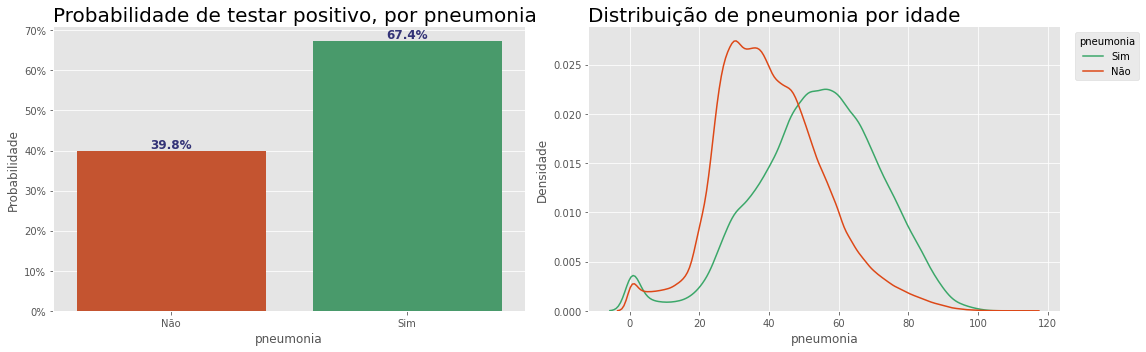

In [34]:
plota_chances_teste('pneumonia')

Vemos que houve um aumento expressivo; A probabilidade de um paciente com pneumonia testar positivo é 1.69x maior do que a de um paciente sem pneumonia. Porém, ainda vemos uma correlação com a idade. Entretando, a diferença de valores aqui é muito superior à diferença das grávidas, então podemos assumir que ainda assim a pneumonia tem algum efeito no resultado do teste de covid

### Comorbidades

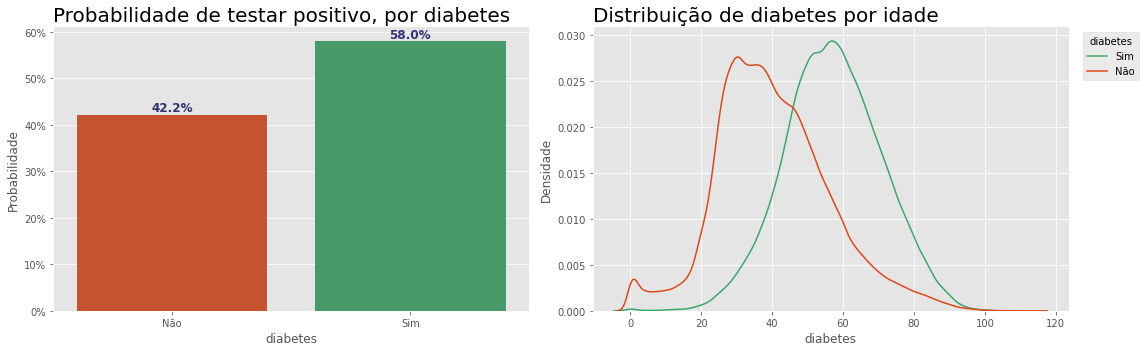

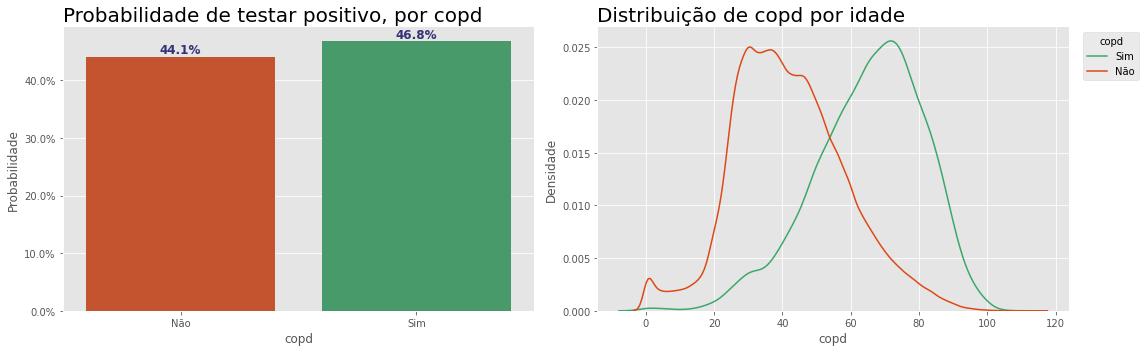

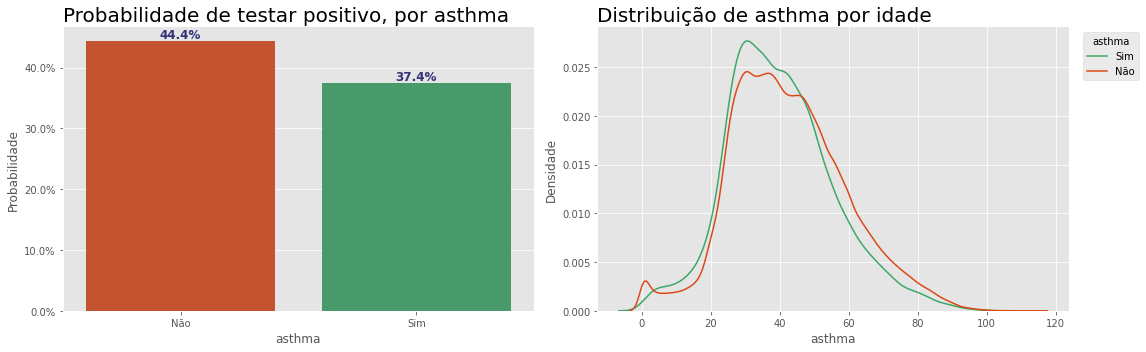

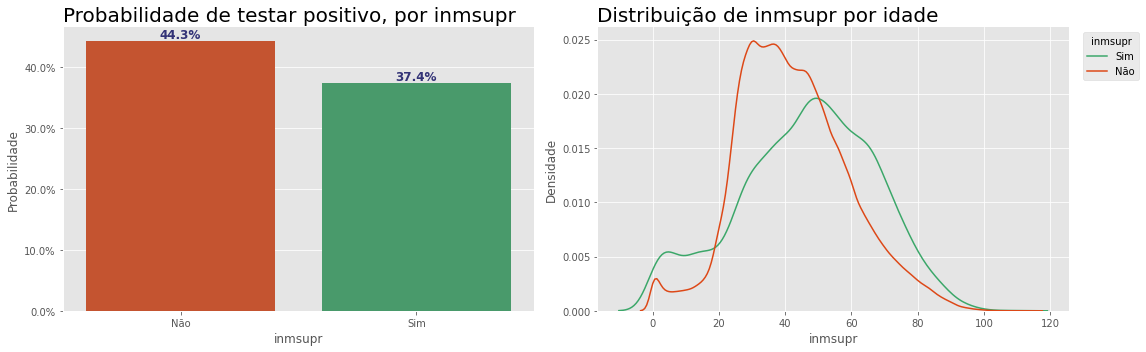

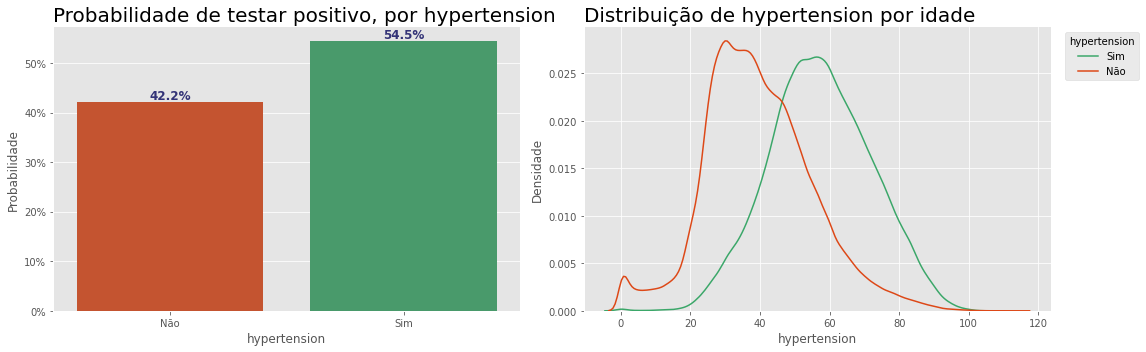

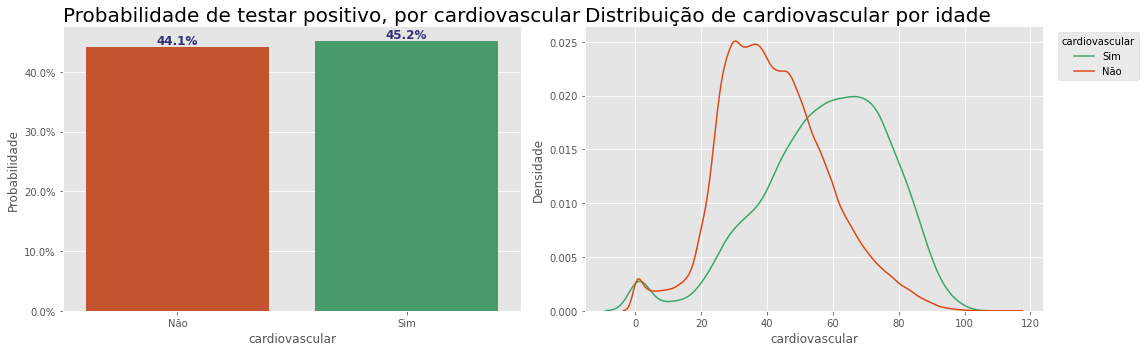

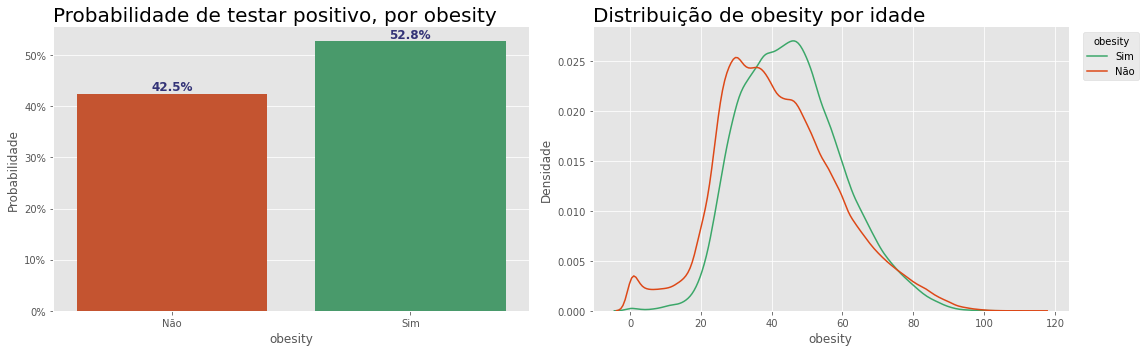

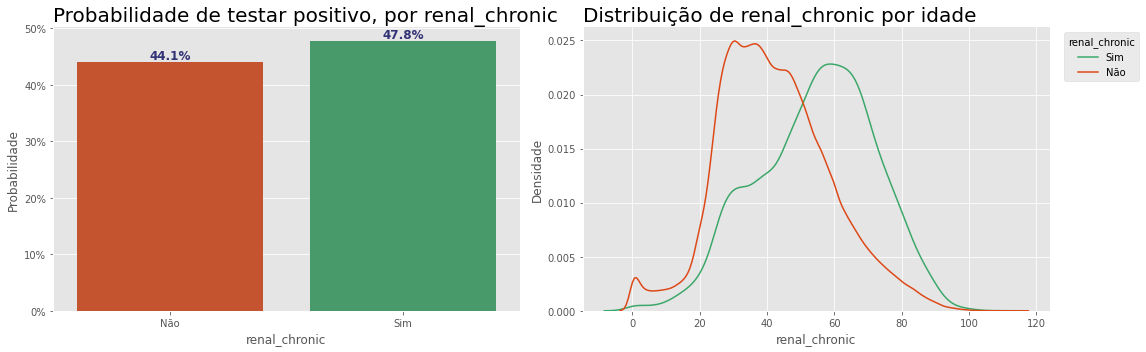

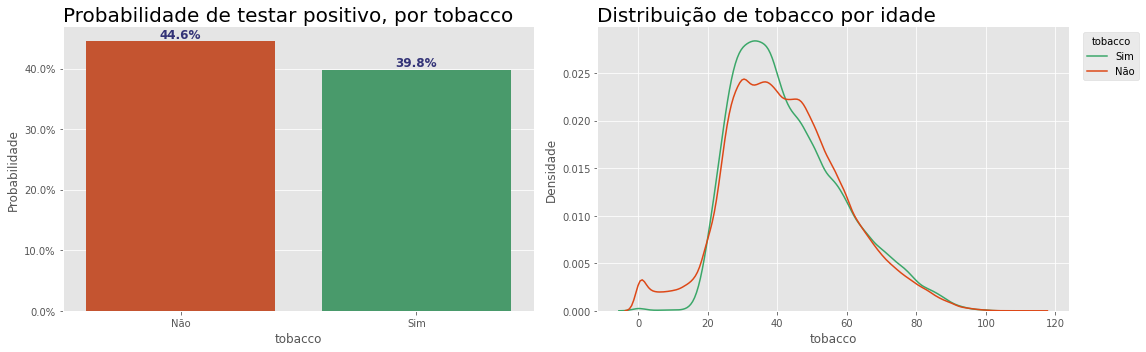

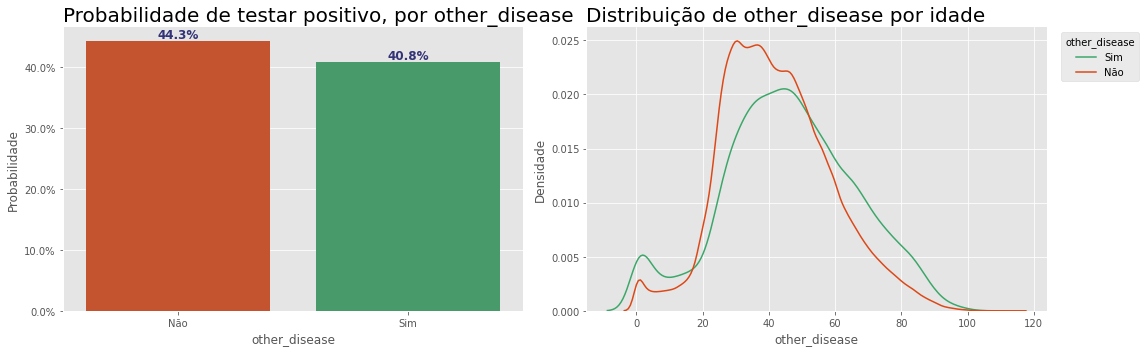

In [35]:
comorbidades = ['diabetes', 'copd', 
                'asthma','inmsupr', 'hypertension', 'cardiovascular', 
                'obesity', 'renal_chronic','tobacco', 'other_disease']

for c in comorbidades:
    plota_chances_teste(c)


Aqui, podemos notar alguns dados interessantes.

**Diabetes**: Teve um aumento expressivo de casos, embora também esteja fortemente correlacionada com a idade do paciente.

**COPD**: Teve um aumento leve, que poder ser explicado pela correlação com a idade do paciente.

**Asma**: Não apresenta correlação com a idade do paciente, porém reduz a probabilidade de testar positivo.

**Imunossupressão**: Pacientes imunossuprimidos apresentam uma taxa menor de covid. Aqui, talvez isso possa ser explicado por uma varíavel que não se encontra no problema. Tempo. Pacientes imunossuprimidos começaram a ser vacinados antes dos outros, o que, dependendo da data dos dados, pode ter uma relação com a redução dos casos. Outro fator que poderia levar a explicar é que pacientes imunossuprimidos por natureza tendem a se cuidar mais pelos riscos aumentados, e então tomaram precauções a mais para não se contaminarem com COVID. Também há uma correlação inversa com a idade, o que, caso as conclusões acima não sejam verdade, pode representar que pacientes imunossuprimidos realmente tem uma probabildade menor de pegar covid.

**Hipertensão**: Pacientes hipertensos apresentaram um aumento moderado na taxa de testes positivos, porém novamente há forte correlação com a feature idade

**Doença Cardiovascular**: Aumento muito pequeno que pode ser explicado pela correlação com a feature idade

**Obesidade**: Tem uma correlação menor com a variável idade e um aumento moderado de casos. Pode sim estar correlacionada com o aumento do resultado dos testes de covid.

**Doença Renal**: Houve um pequeno aumento na taxa de testes positivos, porém é outra variável fortemente correlacionada com a idade

**Tabaco**: Vemos que não há correlação dos fumantes com a idade (a distribuição de fumantes e não fumantes por idade é praticamente igual), porém o tabaco reduziu o numero de testes positivos. Houveram estudos, em Maio de 2020 analisando a correlação da nicotina com a prevenção do COVID, mas não foram terminados. Um fator que pode atrapalhar essa varíavel é que pessoas diferentes tem concepções diferentes sobre o que te torna "fumante", então a resposta pode ser enviesada pela maneira como os pacientes respondem, e podem não condizer com a realidade.

**Outras Doenças**: Variável muito abrangente. Não há correlação com idade, mas não é possivel determinar o que "outras doenças" podem representar.

# Modelagem de Dados

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.compose import make_column_transformer

from sklearn.metrics import fbeta_score
from functools import partial

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import cross_validate

from libs import utils


In [ ]:
N_JOBS = 8 # Change here depending on CPU threads
RANDOM_STATE = 42
plt.style.use('ggplot')
color_palette = sns.color_palette("muted", 10)

#Sumindo com o erro do loc
pd.options.mode.chained_assignment = None

### Carregando o modelo salvo em pickle

In [ ]:
df = pd.read_pickle('./datasets/dfCovid.pkl')

In [ ]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sex,0,0,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,0,1,0
patient_type,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
intubed,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
pneumonia,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
age,27,24,54,30,60,47,63,56,41,39,46,45,28,34,38,34,49,46,39,63
pregnancy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
diabetes,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
copd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
asthma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
inmsupr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499671 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   sex                          499671 non-null  uint8
 1   patient_type                 499671 non-null  uint8
 2   intubed                      499671 non-null  uint8
 3   pneumonia                    499671 non-null  uint8
 4   age                          499671 non-null  uint8
 5   pregnancy                    499671 non-null  uint8
 6   diabetes                     499671 non-null  uint8
 7   copd                         499671 non-null  uint8
 8   asthma                       499671 non-null  uint8
 9   inmsupr                      499671 non-null  uint8
 10  hypertension                 499671 non-null  uint8
 11  other_disease                499671 non-null  uint8
 12  cardiovascular               499671 non-null  uint8
 13  obesity                      

### Métricas

Antes de começar a treinar os modelos, precisamos definir as métricas pelas quais os modelos serão avaliados. Como tratamos de casos de covid, temos um interesse muito grande em classificar pessoas com covid corretamente. Se uma pessoa tem covid, é de extrema importância não classificarmos ela como não tendo covid. Se uma pessoa não tem covid, o impacto de classificá-la de maneira incorreta como tendo covid é menor.

Portanto, nosso maior interesse está em aumentar o recall da Classe 1, que representa os casos confirmados de Covid. Portanto, utilizaremos a métrica FBeta-Score, na qual podemos atribuir um peso maior para a precision ou para o Recall. 

Utilizaremos Beta = 2, para atribuir um peso maior para o Recall (Quando Beta > 1, Recall é priorizado)

In [44]:
f2_score = partial(fbeta_score, pos_label=1, beta=2)

# Instanciar metrica como função para poder alterar caso necessário
def evaluation_metrics(y_true,y_pred):
    return f2_score(y_true, y_pred)


### Dividindo os dados

In [42]:
target = 'covid_res'
features = df.columns.drop(target)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)




### Column Transformer

In [ ]:
ct = make_column_transformer((StandardScaler(), X_train.columns))
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Rodando os modelos
def test_models(
        model_list,
        metric,
        X_train,
        X_test,
        y_train,
        y_test,
        threshold = 0.5):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        metric: Métrica de avaliação a ser utilizada
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
        threshold: threshold para avaliar os modelos (percentual para target = 1)
    """

    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:,1]

        metric_result = metric(y_test,utils.binarize(y_proba, threshold))

        response[mdl.get('model_name')] = {
            "model": model,
            "y_proba": y_proba,
            "metric": metric_result,
        }

    return response
    
    


In [ ]:
list_models = [
    {
        "model_name": "LightGBM",
        "estimator": LGBMClassifier(random_state=RANDOM_STATE, n_jobs=N_JOBS)
    },
    {
        "model_name": "Random Forest",
        "estimator": RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=N_JOBS)
    },
    {
        "model_name": "XGBoost",
        "estimator": XGBClassifier(random_state=RANDOM_STATE, n_jobs=N_JOBS)
    }
]


In [ ]:
pipeline_response = test_models(
    list_models,
    evaluation_metrics,
    X_train,
    X_test,
    y_train,
    y_test,
    threshold = 0.5
)

C:\Users\Gabriel\anaconda3\envs\dataScienceDegree\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Vamos conferir os resultados dos modelos dado o threshold padrão.

In [ ]:
for name, info in pipeline_response.items():
    print(f"{name}: {info['metric']:.4f}")

Random Forest: 0.4208
XGBoost: 0.4338
LightGBM: 0.4246


Sem ajuste de threshold, o XGBoost se saiu melhor. Mas como o ajuste de threshold é pouco custoso (só rodar a métrica), vamos fazer uma ajuste de threshold para ver qual modelo poderia se sair melhor antes de escolher qual vamos otimizar

<ipython-input-13-ef4f1af65533>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


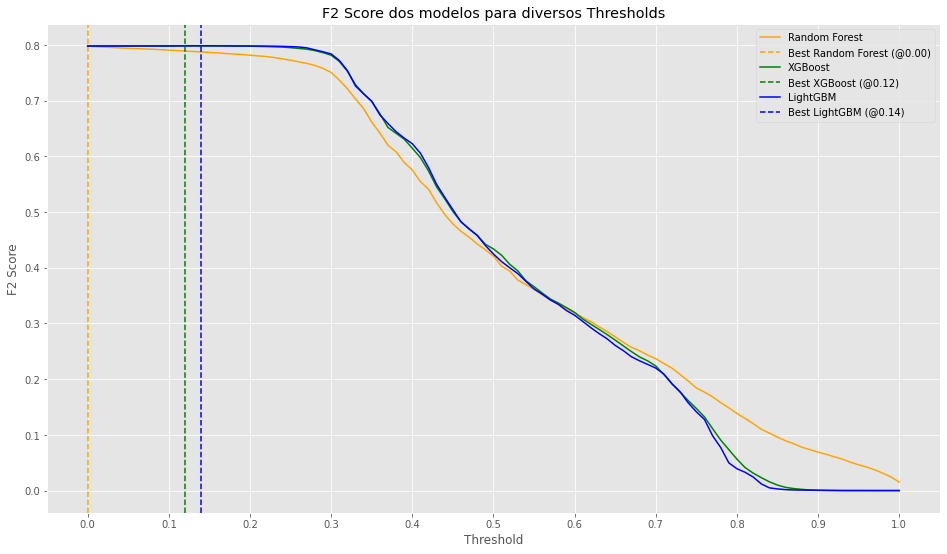

In [ ]:
import matplotlib.ticker as plticker

colors = ['orange','green','blue']
i = 0
fig, ax = utils.cria_fig_ax()
for name, info in pipeline_response.items():
    thresh, metric, best_thresh = utils.metric_over_thresholds(evaluation_metrics, y_test, info['y_proba'])

    pipeline_response[name]['best_thresh'] = best_thresh
    pipeline_response[name]['all_metrics'] = list(zip(thresh, metric))

    color = colors[i]
    
    pipeline_response[name]['color'] = color
    
    ax.plot(thresh, metric, label=name, color=color)
    ax.axvline(best_thresh, linestyle='--', color=color, label=f"Best {name} (@{best_thresh:.2f})")
    i = i+1

ax.set_xlabel('Threshold')
ax.set_ylabel('F2 Score')
loc = plticker.MultipleLocator(base=0.1)
ax.xaxis.set_major_locator(loc)
ax.set_title("F2 Score dos modelos para diversos Thresholds")
ax.legend()
fig.show()


Checando apenas o inicio dos thresholds

<ipython-input-14-6589a0f0b6a1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


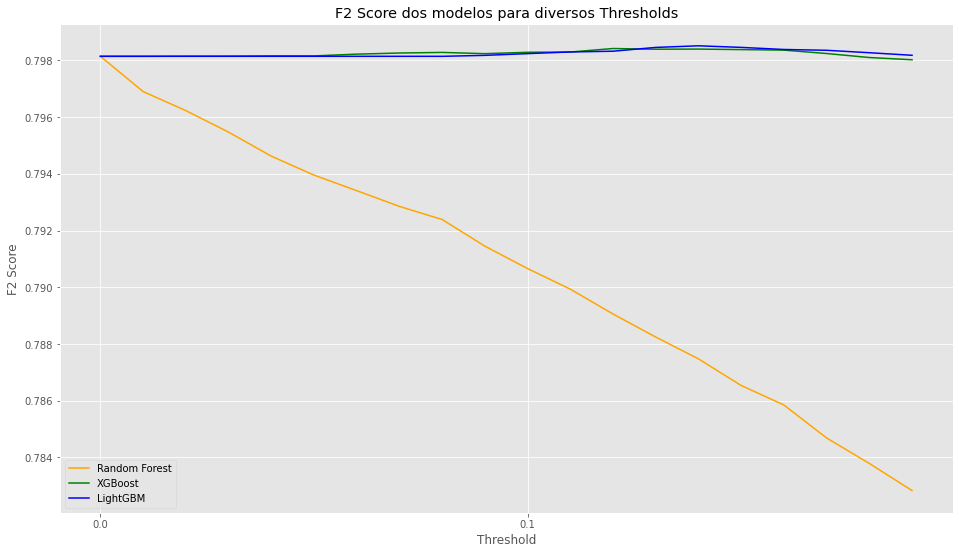

In [ ]:
fig, ax = utils.cria_fig_ax()

for name, info in pipeline_response.items():
    thresh, metric = zip(*info['all_metrics'][0:20])
    ax.plot(thresh, metric, label=name, color=info['color'])

ax.set_xlabel('Threshold')
ax.set_ylabel('F2 Score')
loc = plticker.MultipleLocator(base=0.1)
ax.xaxis.set_major_locator(loc)
ax.set_title("F2 Score dos modelos para diversos Thresholds")
ax.legend()
fig.show()


Vamos aproximar ainda mais o gráfico, observando apenas o XGBoost e o LightGBM

<ipython-input-15-6deb29ae13bb>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


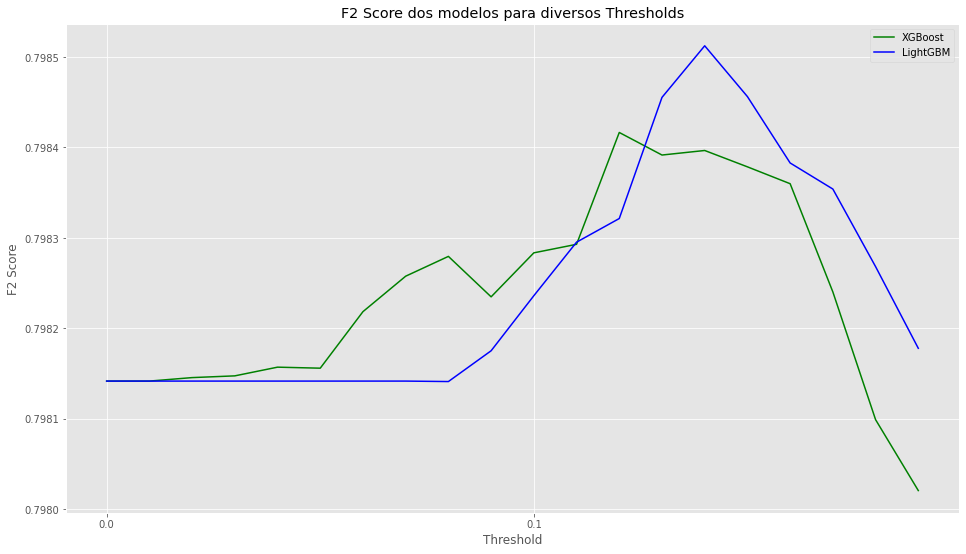

In [ ]:
i = 0
fig, ax = utils.cria_fig_ax()

response_without_RF = {'XGBoost':pipeline_response['XGBoost'],'LightGBM':pipeline_response['LightGBM']}

for name, info in response_without_RF.items():
    thresh, metric = zip(*info['all_metrics'][0:20])
    ax.plot(thresh, metric, label=name, color=info['color'])

ax.set_xlabel('Threshold')
ax.set_ylabel('F2 Score')
loc = plticker.MultipleLocator(base=0.1)
ax.xaxis.set_major_locator(loc)
ax.set_title("F2 Score dos modelos para diversos Thresholds")
ax.legend()
fig.show()


Vemos então que, embora os modelos tenham performado muito parecido, apenas com a modificação do Threshold o LightGBM se saiu melhor. Vamos então escolher o LightGBM para fazer a otimização.

# Otimização do Modelo

https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

In [37]:
import pandas as pd
import numpy as np
import pickle
import optuna 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, fbeta_score
from libs import utils
from lightgbm import LGBMClassifier
from functools import partial

In [38]:
N_JOBS = 8  # Change here depending on CPU threads
RANDOM_STATE = 42

In [23]:
df = pd.read_pickle('./datasets/dfCovid.pkl')

f2_score = partial(fbeta_score, pos_label=1, beta=2)

# Instanciar metrica como função para poder alterar caso necessário
def evaluation_metrics(y_true, y_pred):
    return f2_score(y_true, y_pred)


In [17]:
target = 'covid_res'
features = df.columns.drop(target)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)


In [ ]:
pipeline_response['LightGBM']['model'].get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': 8,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [10]:
def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int('n_estimators', 100, 1000, log=True),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 200, 10000, step=100),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 100, step=5),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 100, step=5),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 15),
        "subsample": trial.suggest_float(
            "subsample", 0.2, 0.9, step=0.1
        ),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [1]),
        "colsample_bytree": trial.suggest_float(
            "colsample_bytree", 0.2, 0.9, step=0.1
        ),
    }

    model = LGBMClassifier(objective="binary", **param_grid, verbose=-1)

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    kf_scores = []
    threshold_list = []

    for idx, (train_index, val_index) in enumerate(kf.split(X, y)):
        KFold_X_train, KFold_X_val = X.values[train_index], X.values[val_index]
        KFold_y_train, KFold_y_val = y.values[train_index].ravel(
        ), y.values[val_index].ravel()

        model.fit(KFold_X_train, KFold_y_train)
        
        preds = model.predict_proba(KFold_X_val)[:,1]

        # Calcula as métricas para cada thresholds
        thresh, metric, _ = utils.metric_over_thresholds(evaluation_metrics,KFold_y_val,preds)

        # Salva os resultados das métricas por threshold de cada fold
        if idx == 0:
            threshold_list = thresh

        kf_scores.append(metric)
    
    # Calcula a média das métricas de cada threshold, para todos os folds, e localiza a métrica ideal
    metrics_mean = np.mean(kf_scores,axis=0)

    # Inverte o array para calcular o argmax, para garantir que pegue o maior threshold com resultado ideal
    thresh_idx = np.argmax(metrics_mean[::-1])
    optimal_thresh = threshold_list[::-1][thresh_idx]

    print('optimal_thresh', optimal_thresh, 'optimal_mean', metrics_mean[::-1][thresh_idx])
    return metrics_mean[::-1][thresh_idx]


In [ ]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
def func(trial): return objective(trial, pd.DataFrame(X_train), pd.DataFrame(y_train))
study.optimize(func, n_trials=500, timeout=1800)

[I 2022-02-20 23:36:48,196] A new study created in memory with name: LGBM Classifier
[I 2022-02-20 23:37:02,401] Trial 0 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 313, 'learning_rate': 0.03272699035044199, 'num_leaves': 1200, 'max_depth': 11, 'min_child_samples': 9800, 'reg_alpha': 65, 'reg_lambda': 0, 'min_split_gain': 10.140144117054888, 'subsample': 0.2, 'subsample_freq': 1, 'colsample_bytree': 0.30000000000000004}. Best is trial 0 with value: 0.7981436333022589.


optimal_thresh 0.33 optimal_mean 0.7981436333022589


[I 2022-02-20 23:37:16,410] Trial 1 finished with value: 0.7981784240330664 and parameters: {'n_estimators': 241, 'learning_rate': 0.16246512593433296, 'num_leaves': 1300, 'max_depth': 5, 'min_child_samples': 2800, 'reg_alpha': 100, 'reg_lambda': 15, 'min_split_gain': 5.419498043488152, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 1 with value: 0.7981784240330664.


optimal_thresh 0.16 optimal_mean 0.7981784240330664


[I 2022-02-20 23:37:29,598] Trial 2 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 234, 'learning_rate': 0.03257473698280335, 'num_leaves': 1140, 'max_depth': 6, 'min_child_samples': 6300, 'reg_alpha': 70, 'reg_lambda': 85, 'min_split_gain': 8.914917023955192, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 1 with value: 0.7981784240330664.


optimal_thresh 0.2 optimal_mean 0.7981436333022589


[I 2022-02-20 23:37:41,660] Trial 3 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 110, 'learning_rate': 0.024663666527464052, 'num_leaves': 2760, 'max_depth': 9, 'min_child_samples': 2300, 'reg_alpha': 80, 'reg_lambda': 95, 'min_split_gain': 8.823178574059797, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 1 with value: 0.7981784240330664.


optimal_thresh 0.26 optimal_mean 0.7981436333022589


[I 2022-02-20 23:37:54,404] Trial 4 finished with value: 0.7982747262499531 and parameters: {'n_estimators': 124, 'learning_rate': 0.054565047883021994, 'num_leaves': 2040, 'max_depth': 9, 'min_child_samples': 2200, 'reg_alpha': 50, 'reg_lambda': 50, 'min_split_gain': 0.07388286693315427, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.2 optimal_mean 0.7982747262499531


[I 2022-02-20 23:38:07,582] Trial 5 finished with value: 0.7981598463131421 and parameters: {'n_estimators': 243, 'learning_rate': 0.19111219070578278, 'num_leaves': 1380, 'max_depth': 7, 'min_child_samples': 7400, 'reg_alpha': 100, 'reg_lambda': 20, 'min_split_gain': 12.736556432837196, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.19 optimal_mean 0.7981598463131421


[I 2022-02-20 23:38:25,950] Trial 6 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 616, 'learning_rate': 0.1530138632161085, 'num_leaves': 1240, 'max_depth': 5, 'min_child_samples': 6100, 'reg_alpha': 0, 'reg_lambda': 70, 'min_split_gain': 11.299602722519747, 'subsample': 0.30000000000000004, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.2 optimal_mean 0.7981436333022589


[I 2022-02-20 23:38:37,794] Trial 7 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 176, 'learning_rate': 0.13268427862326904, 'num_leaves': 660, 'max_depth': 12, 'min_child_samples': 6800, 'reg_alpha': 20, 'reg_lambda': 70, 'min_split_gain': 2.7560658769750477, 'subsample': 0.2, 'subsample_freq': 1, 'colsample_bytree': 0.30000000000000004}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.24 optimal_mean 0.7981436333022589


[I 2022-02-20 23:38:53,560] Trial 8 finished with value: 0.798148364403229 and parameters: {'n_estimators': 355, 'learning_rate': 0.0806724595806048, 'num_leaves': 2020, 'max_depth': 8, 'min_child_samples': 200, 'reg_alpha': 55, 'reg_lambda': 35, 'min_split_gain': 10.005887503152382, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.14 optimal_mean 0.798148364403229


[I 2022-02-20 23:39:11,086] Trial 9 finished with value: 0.7981987251469188 and parameters: {'n_estimators': 522, 'learning_rate': 0.25674248235502045, 'num_leaves': 140, 'max_depth': 8, 'min_child_samples': 1500, 'reg_alpha': 85, 'reg_lambda': 0, 'min_split_gain': 2.8684267788243045, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.17 optimal_mean 0.7981987251469188


[I 2022-02-20 23:39:23,531] Trial 10 finished with value: 0.7981577204355694 and parameters: {'n_estimators': 104, 'learning_rate': 0.08625054320727683, 'num_leaves': 2220, 'max_depth': 10, 'min_child_samples': 3900, 'reg_alpha': 35, 'reg_lambda': 60, 'min_split_gain': 0.0738138166291824, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 4 with value: 0.7982747262499531.


optimal_thresh 0.18 optimal_mean 0.7981577204355694


[I 2022-02-20 23:40:03,052] Trial 11 finished with value: 0.7987989594392755 and parameters: {'n_estimators': 977, 'learning_rate': 0.29871560261296676, 'num_leaves': 300, 'max_depth': 8, 'min_child_samples': 300, 'reg_alpha': 40, 'reg_lambda': 40, 'min_split_gain': 0.01963589698489692, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7987989594392755


[I 2022-02-20 23:40:33,021] Trial 12 finished with value: 0.798562204558393 and parameters: {'n_estimators': 966, 'learning_rate': 0.2916091009758903, 'num_leaves': 2040, 'max_depth': 3, 'min_child_samples': 200, 'reg_alpha': 40, 'reg_lambda': 50, 'min_split_gain': 0.970154238587656, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.798562204558393


[I 2022-02-20 23:40:59,252] Trial 13 finished with value: 0.7982579039026685 and parameters: {'n_estimators': 976, 'learning_rate': 0.29552735264661845, 'num_leaves': 20, 'max_depth': 3, 'min_child_samples': 600, 'reg_alpha': 30, 'reg_lambda': 40, 'min_split_gain': 3.0674784601229126, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7982579039026685


[I 2022-02-20 23:41:24,937] Trial 14 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 975, 'learning_rate': 0.24121623607012693, 'num_leaves': 640, 'max_depth': 3, 'min_child_samples': 4000, 'reg_alpha': 40, 'reg_lambda': 35, 'min_split_gain': 6.265325689925097, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7981436333022589


[I 2022-02-20 23:41:47,037] Trial 15 finished with value: 0.7981613984632372 and parameters: {'n_estimators': 669, 'learning_rate': 0.29425451415401743, 'num_leaves': 2880, 'max_depth': 5, 'min_child_samples': 1100, 'reg_alpha': 15, 'reg_lambda': 50, 'min_split_gain': 14.765542449803668, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.14 optimal_mean 0.7981613984632372


[I 2022-02-20 23:42:11,431] Trial 16 finished with value: 0.7981636014920813 and parameters: {'n_estimators': 755, 'learning_rate': 0.2296254502358533, 'num_leaves': 2440, 'max_depth': 7, 'min_child_samples': 3500, 'reg_alpha': 50, 'reg_lambda': 25, 'min_split_gain': 1.5515210055806197, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.12 optimal_mean 0.7981636014920813


[I 2022-02-20 23:42:26,481] Trial 17 finished with value: 0.7984550045809936 and parameters: {'n_estimators': 440, 'learning_rate': 0.2059837453630123, 'num_leaves': 1720, 'max_depth': 4, 'min_child_samples': 200, 'reg_alpha': 20, 'reg_lambda': 65, 'min_split_gain': 4.05475701668732, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7984550045809936


[I 2022-02-20 23:42:47,254] Trial 18 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 788, 'learning_rate': 0.2731212080418901, 'num_leaves': 800, 'max_depth': 6, 'min_child_samples': 5100, 'reg_alpha': 0, 'reg_lambda': 80, 'min_split_gain': 5.176017174569405, 'subsample': 0.30000000000000004, 'subsample_freq': 1, 'colsample_bytree': 0.2}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7981436333022589


[I 2022-02-20 23:43:06,384] Trial 19 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 485, 'learning_rate': 0.26564494299431796, 'num_leaves': 1760, 'max_depth': 10, 'min_child_samples': 8800, 'reg_alpha': 40, 'reg_lambda': 55, 'min_split_gain': 1.4349953762551768, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7981436333022589


[I 2022-02-20 23:43:29,138] Trial 20 finished with value: 0.7981538041331737 and parameters: {'n_estimators': 887, 'learning_rate': 0.21231161489865685, 'num_leaves': 320, 'max_depth': 6, 'min_child_samples': 1600, 'reg_alpha': 60, 'reg_lambda': 40, 'min_split_gain': 6.551978640232411, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.14 optimal_mean 0.7981538041331737


[I 2022-02-20 23:43:43,986] Trial 21 finished with value: 0.7984513206385526 and parameters: {'n_estimators': 433, 'learning_rate': 0.20236051932295823, 'num_leaves': 1660, 'max_depth': 4, 'min_child_samples': 400, 'reg_alpha': 25, 'reg_lambda': 65, 'min_split_gain': 4.059649629491742, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7984513206385526


[I 2022-02-20 23:44:01,354] Trial 22 finished with value: 0.7987392318616173 and parameters: {'n_estimators': 602, 'learning_rate': 0.29417989285566226, 'num_leaves': 2500, 'max_depth': 4, 'min_child_samples': 200, 'reg_alpha': 10, 'reg_lambda': 80, 'min_split_gain': 1.2972043976700824, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7987392318616173


[I 2022-02-20 23:44:18,021] Trial 23 finished with value: 0.7985407250395047 and parameters: {'n_estimators': 611, 'learning_rate': 0.2994623294418944, 'num_leaves': 2700, 'max_depth': 3, 'min_child_samples': 1400, 'reg_alpha': 10, 'reg_lambda': 100, 'min_split_gain': 1.3483696452261542, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7985407250395047


[I 2022-02-20 23:44:37,644] Trial 24 finished with value: 0.7982744011645926 and parameters: {'n_estimators': 768, 'learning_rate': 0.2719956005583326, 'num_leaves': 2400, 'max_depth': 4, 'min_child_samples': 2300, 'reg_alpha': 45, 'reg_lambda': 80, 'min_split_gain': 1.1981612457252355, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7982744011645926


[I 2022-02-20 23:45:11,811] Trial 25 finished with value: 0.7986654451878319 and parameters: {'n_estimators': 845, 'learning_rate': 0.24334521789006128, 'num_leaves': 1980, 'max_depth': 4, 'min_child_samples': 1100, 'reg_alpha': 10, 'reg_lambda': 45, 'min_split_gain': 0.14598072550335878, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7986654451878319


[I 2022-02-20 23:45:32,195] Trial 26 finished with value: 0.798197894718619 and parameters: {'n_estimators': 573, 'learning_rate': 0.24719378992694774, 'num_leaves': 2520, 'max_depth': 7, 'min_child_samples': 3100, 'reg_alpha': 10, 'reg_lambda': 30, 'min_split_gain': 2.348862988727074, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.798197894718619


[I 2022-02-20 23:45:49,345] Trial 27 finished with value: 0.7983843436658052 and parameters: {'n_estimators': 721, 'learning_rate': 0.2357525081789178, 'num_leaves': 3000, 'max_depth': 9, 'min_child_samples': 1200, 'reg_alpha': 5, 'reg_lambda': 45, 'min_split_gain': 4.125951291465071, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7983843436658052


[I 2022-02-20 23:46:15,946] Trial 28 finished with value: 0.7981837720435971 and parameters: {'n_estimators': 828, 'learning_rate': 0.2715954210878946, 'num_leaves': 940, 'max_depth': 5, 'min_child_samples': 4900, 'reg_alpha': 30, 'reg_lambda': 90, 'min_split_gain': 0.35165851738539283, 'subsample': 0.30000000000000004, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7981837720435971


[I 2022-02-20 23:46:33,430] Trial 29 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 390, 'learning_rate': 0.17665819991455528, 'num_leaves': 2260, 'max_depth': 4, 'min_child_samples': 9800, 'reg_alpha': 15, 'reg_lambda': 10, 'min_split_gain': 2.147137006545829, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7981436333022589


[I 2022-02-20 23:46:46,529] Trial 30 finished with value: 0.7984126670680362 and parameters: {'n_estimators': 294, 'learning_rate': 0.22250073909279972, 'num_leaves': 1560, 'max_depth': 11, 'min_child_samples': 900, 'reg_alpha': 25, 'reg_lambda': 75, 'min_split_gain': 3.6196499557463504, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7984126670680362


[I 2022-02-20 23:47:17,987] Trial 31 finished with value: 0.798406184738696 and parameters: {'n_estimators': 999, 'learning_rate': 0.283936435961705, 'num_leaves': 1940, 'max_depth': 3, 'min_child_samples': 1800, 'reg_alpha': 35, 'reg_lambda': 55, 'min_split_gain': 0.8686027647424285, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.798406184738696


[I 2022-02-20 23:47:42,919] Trial 32 finished with value: 0.7983920482043028 and parameters: {'n_estimators': 869, 'learning_rate': 0.2547214540861161, 'num_leaves': 2220, 'max_depth': 4, 'min_child_samples': 600, 'reg_alpha': 65, 'reg_lambda': 45, 'min_split_gain': 2.033320426138051, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.2 optimal_mean 0.7983920482043028


[I 2022-02-20 23:48:10,899] Trial 33 finished with value: 0.798665020673726 and parameters: {'n_estimators': 691, 'learning_rate': 0.2838842380665186, 'num_leaves': 1900, 'max_depth': 3, 'min_child_samples': 900, 'reg_alpha': 5, 'reg_lambda': 55, 'min_split_gain': 0.03136868876451952, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.798665020673726


[I 2022-02-20 23:48:39,018] Trial 34 finished with value: 0.798648413318238 and parameters: {'n_estimators': 669, 'learning_rate': 0.278805994854156, 'num_leaves': 2620, 'max_depth': 6, 'min_child_samples': 2600, 'reg_alpha': 5, 'reg_lambda': 60, 'min_split_gain': 0.007167767020329726, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.798648413318238


[I 2022-02-20 23:48:54,557] Trial 35 finished with value: 0.7982014747395202 and parameters: {'n_estimators': 507, 'learning_rate': 0.25658693017884554, 'num_leaves': 1440, 'max_depth': 5, 'min_child_samples': 2000, 'reg_alpha': 10, 'reg_lambda': 30, 'min_split_gain': 4.974999939575329, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7982014747395202


[I 2022-02-20 23:49:13,183] Trial 36 finished with value: 0.7981696130400584 and parameters: {'n_estimators': 561, 'learning_rate': 0.28187736653326245, 'num_leaves': 1840, 'max_depth': 8, 'min_child_samples': 1000, 'reg_alpha': 0, 'reg_lambda': 15, 'min_split_gain': 7.8736138072641815, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7981696130400584


[I 2022-02-20 23:49:37,280] Trial 37 finished with value: 0.7985257270037578 and parameters: {'n_estimators': 658, 'learning_rate': 0.1205381090472879, 'num_leaves': 1000, 'max_depth': 6, 'min_child_samples': 900, 'reg_alpha': 75, 'reg_lambda': 90, 'min_split_gain': 0.6732138720267268, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7985257270037578


[I 2022-02-20 23:49:49,955] Trial 38 finished with value: 0.7981978675736544 and parameters: {'n_estimators': 200, 'learning_rate': 0.2213027141446519, 'num_leaves': 420, 'max_depth': 4, 'min_child_samples': 2800, 'reg_alpha': 20, 'reg_lambda': 40, 'min_split_gain': 1.8981285869119764, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7981978675736544


[I 2022-02-20 23:50:13,140] Trial 39 finished with value: 0.798256541584223 and parameters: {'n_estimators': 853, 'learning_rate': 0.2630930612318382, 'num_leaves': 1540, 'max_depth': 5, 'min_child_samples': 1900, 'reg_alpha': 5, 'reg_lambda': 55, 'min_split_gain': 3.1298247927602287, 'subsample': 0.30000000000000004, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.798256541584223


[I 2022-02-20 23:50:31,521] Trial 40 finished with value: 0.7981890651128427 and parameters: {'n_estimators': 323, 'learning_rate': 0.17690308385473924, 'num_leaves': 1180, 'max_depth': 9, 'min_child_samples': 4600, 'reg_alpha': 15, 'reg_lambda': 25, 'min_split_gain': 0.04850565398048841, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7981890651128427


[I 2022-02-20 23:51:00,226] Trial 41 finished with value: 0.7986383043897397 and parameters: {'n_estimators': 702, 'learning_rate': 0.2767078055716602, 'num_leaves': 2520, 'max_depth': 6, 'min_child_samples': 2700, 'reg_alpha': 5, 'reg_lambda': 60, 'min_split_gain': 0.022305486578402492, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7986383043897397


[I 2022-02-20 23:51:20,215] Trial 42 finished with value: 0.7983493151281216 and parameters: {'n_estimators': 619, 'learning_rate': 0.28399774367552694, 'num_leaves': 2820, 'max_depth': 7, 'min_child_samples': 2500, 'reg_alpha': 0, 'reg_lambda': 70, 'min_split_gain': 0.6576255302214152, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7983493151281216


[I 2022-02-20 23:51:39,797] Trial 43 finished with value: 0.7986766013562153 and parameters: {'n_estimators': 705, 'learning_rate': 0.29792710718921817, 'num_leaves': 2660, 'max_depth': 5, 'min_child_samples': 700, 'reg_alpha': 10, 'reg_lambda': 45, 'min_split_gain': 0.8809480730182111, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7986766013562153


[I 2022-02-20 23:52:00,210] Trial 44 finished with value: 0.7983630702513663 and parameters: {'n_estimators': 880, 'learning_rate': 0.2996897082692005, 'num_leaves': 2100, 'max_depth': 3, 'min_child_samples': 700, 'reg_alpha': 95, 'reg_lambda': 45, 'min_split_gain': 2.373003145849378, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.2 optimal_mean 0.7983630702513663


[I 2022-02-20 23:52:16,293] Trial 45 finished with value: 0.7985658685005578 and parameters: {'n_estimators': 559, 'learning_rate': 0.24402875240770508, 'num_leaves': 2280, 'max_depth': 4, 'min_child_samples': 1400, 'reg_alpha': 25, 'reg_lambda': 35, 'min_split_gain': 1.012932178207224, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7985658685005578


[I 2022-02-20 23:52:27,871] Trial 46 finished with value: 0.798193467453958 and parameters: {'n_estimators': 127, 'learning_rate': 0.2867021846693906, 'num_leaves': 1960, 'max_depth': 3, 'min_child_samples': 600, 'reg_alpha': 15, 'reg_lambda': 50, 'min_split_gain': 9.976292096161144, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.798193467453958


[I 2022-02-20 23:52:48,566] Trial 47 finished with value: 0.7987482035035927 and parameters: {'n_estimators': 754, 'learning_rate': 0.2518115555736037, 'num_leaves': 1300, 'max_depth': 5, 'min_child_samples': 200, 'reg_alpha': 10, 'reg_lambda': 30, 'min_split_gain': 1.4484180455603899, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7987482035035927


[I 2022-02-20 23:53:12,925] Trial 48 finished with value: 0.7985719839930635 and parameters: {'n_estimators': 777, 'learning_rate': 0.01765773475590926, 'num_leaves': 3000, 'max_depth': 5, 'min_child_samples': 200, 'reg_alpha': 30, 'reg_lambda': 30, 'min_split_gain': 3.258120253161196, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.2 optimal_mean 0.7985719839930635


[I 2022-02-20 23:53:33,588] Trial 49 finished with value: 0.7981436333022589 and parameters: {'n_estimators': 925, 'learning_rate': 0.144112616421644, 'num_leaves': 2700, 'max_depth': 8, 'min_child_samples': 7500, 'reg_alpha': 20, 'reg_lambda': 20, 'min_split_gain': 1.56933557904691, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7981436333022589


[I 2022-02-20 23:53:48,904] Trial 50 finished with value: 0.7983771041019039 and parameters: {'n_estimators': 470, 'learning_rate': 0.2541227057141739, 'num_leaves': 1340, 'max_depth': 5, 'min_child_samples': 1600, 'reg_alpha': 55, 'reg_lambda': 40, 'min_split_gain': 2.5952824903534664, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7983771041019039


[I 2022-02-20 23:54:17,085] Trial 51 finished with value: 0.7986391025712604 and parameters: {'n_estimators': 733, 'learning_rate': 0.26517957858177155, 'num_leaves': 2160, 'max_depth': 4, 'min_child_samples': 1100, 'reg_alpha': 10, 'reg_lambda': 35, 'min_split_gain': 0.7726927064937763, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7986391025712604


[I 2022-02-20 23:54:40,463] Trial 52 finished with value: 0.798183614730482 and parameters: {'n_estimators': 801, 'learning_rate': 0.2892224368484546, 'num_leaves': 1860, 'max_depth': 3, 'min_child_samples': 200, 'reg_alpha': 10, 'reg_lambda': 45, 'min_split_gain': 12.01743896913197, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.14 optimal_mean 0.798183614730482


[I 2022-02-20 23:55:06,583] Trial 53 finished with value: 0.7985224571580296 and parameters: {'n_estimators': 629, 'learning_rate': 0.047534794144735784, 'num_leaves': 2380, 'max_depth': 4, 'min_child_samples': 600, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 1.6887103025186727, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7985224571580296


[I 2022-02-20 23:55:41,768] Trial 54 finished with value: 0.7986172043248299 and parameters: {'n_estimators': 923, 'learning_rate': 0.2987839779984073, 'num_leaves': 560, 'max_depth': 7, 'min_child_samples': 1100, 'reg_alpha': 15, 'reg_lambda': 55, 'min_split_gain': 0.5053810895749205, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7986172043248299


[I 2022-02-20 23:56:02,398] Trial 55 finished with value: 0.7981442400948348 and parameters: {'n_estimators': 718, 'learning_rate': 0.23509799029600778, 'num_leaves': 140, 'max_depth': 5, 'min_child_samples': 5800, 'reg_alpha': 20, 'reg_lambda': 5, 'min_split_gain': 1.0944565569903868, 'subsample': 0.2, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.23 optimal_mean 0.7981442400948348


[I 2022-02-20 23:56:19,818] Trial 56 finished with value: 0.7983990111824781 and parameters: {'n_estimators': 536, 'learning_rate': 0.24852497351695002, 'num_leaves': 1080, 'max_depth': 9, 'min_child_samples': 2000, 'reg_alpha': 5, 'reg_lambda': 50, 'min_split_gain': 1.9067908627307635, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7983990111824781


[I 2022-02-20 23:56:37,326] Trial 57 finished with value: 0.7982602769974273 and parameters: {'n_estimators': 810, 'learning_rate': 0.26443902685126564, 'num_leaves': 820, 'max_depth': 4, 'min_child_samples': 500, 'reg_alpha': 10, 'reg_lambda': 35, 'min_split_gain': 14.70573345396863, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7982602769974273


[I 2022-02-20 23:56:58,827] Trial 58 finished with value: 0.7982677214432462 and parameters: {'n_estimators': 680, 'learning_rate': 0.2886671310293376, 'num_leaves': 1620, 'max_depth': 3, 'min_child_samples': 1400, 'reg_alpha': 45, 'reg_lambda': 65, 'min_split_gain': 1.3521276056542273, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7982677214432462


[I 2022-02-20 23:57:25,327] Trial 59 finished with value: 0.7983585844515757 and parameters: {'n_estimators': 995, 'learning_rate': 0.2729185419691554, 'num_leaves': 2620, 'max_depth': 5, 'min_child_samples': 800, 'reg_alpha': 35, 'reg_lambda': 20, 'min_split_gain': 2.693356839040222, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7983585844515757


[I 2022-02-20 23:57:43,121] Trial 60 finished with value: 0.7985842580724782 and parameters: {'n_estimators': 605, 'learning_rate': 0.08508090154628593, 'num_leaves': 2340, 'max_depth': 6, 'min_child_samples': 200, 'reg_alpha': 5, 'reg_lambda': 100, 'min_split_gain': 4.461634799694831, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7985842580724782


[I 2022-02-20 23:58:09,503] Trial 61 finished with value: 0.7985723901557045 and parameters: {'n_estimators': 675, 'learning_rate': 0.27823716612909016, 'num_leaves': 2560, 'max_depth': 6, 'min_child_samples': 3700, 'reg_alpha': 5, 'reg_lambda': 60, 'min_split_gain': 0.08767295033703318, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7985723901557045


[I 2022-02-20 23:58:32,090] Trial 62 finished with value: 0.7984139194331639 and parameters: {'n_estimators': 742, 'learning_rate': 0.29013493520780204, 'num_leaves': 2900, 'max_depth': 6, 'min_child_samples': 3200, 'reg_alpha': 0, 'reg_lambda': 75, 'min_split_gain': 0.5233554549206774, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7984139194331639


[I 2022-02-20 23:59:03,172] Trial 63 finished with value: 0.7986507514541548 and parameters: {'n_estimators': 843, 'learning_rate': 0.27708426739687675, 'num_leaves': 2680, 'max_depth': 8, 'min_child_samples': 2300, 'reg_alpha': 15, 'reg_lambda': 40, 'min_split_gain': 0.051731714919499364, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7986507514541548


[I 2022-02-20 23:59:23,446] Trial 64 finished with value: 0.7985846729619581 and parameters: {'n_estimators': 842, 'learning_rate': 0.2637434186260696, 'num_leaves': 2740, 'max_depth': 8, 'min_child_samples': 1200, 'reg_alpha': 15, 'reg_lambda': 40, 'min_split_gain': 1.1369939784311789, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7985846729619581


[I 2022-02-20 23:59:49,917] Trial 65 finished with value: 0.7985380061524703 and parameters: {'n_estimators': 932, 'learning_rate': 0.11358604847866868, 'num_leaves': 2480, 'max_depth': 10, 'min_child_samples': 1800, 'reg_alpha': 25, 'reg_lambda': 30, 'min_split_gain': 0.47949616395308925, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7985380061524703


[I 2022-02-21 00:00:10,565] Trial 66 finished with value: 0.7984042788252774 and parameters: {'n_estimators': 794, 'learning_rate': 0.2297249866038611, 'num_leaves': 2100, 'max_depth': 8, 'min_child_samples': 800, 'reg_alpha': 20, 'reg_lambda': 45, 'min_split_gain': 6.398433249847786, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7984042788252774


[I 2022-02-21 00:00:39,973] Trial 67 finished with value: 0.7984728801841127 and parameters: {'n_estimators': 897, 'learning_rate': 0.292918805369007, 'num_leaves': 1440, 'max_depth': 7, 'min_child_samples': 2200, 'reg_alpha': 10, 'reg_lambda': 40, 'min_split_gain': 1.460487048582503, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.16 optimal_mean 0.7984728801841127


[I 2022-02-21 00:01:01,652] Trial 68 finished with value: 0.7981520524797003 and parameters: {'n_estimators': 738, 'learning_rate': 0.2709170361154867, 'num_leaves': 1740, 'max_depth': 9, 'min_child_samples': 1600, 'reg_alpha': 15, 'reg_lambda': 50, 'min_split_gain': 5.8154547465780775, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.2}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.08 optimal_mean 0.7981520524797003


[I 2022-02-21 00:01:16,100] Trial 69 finished with value: 0.798523303763794 and parameters: {'n_estimators': 253, 'learning_rate': 0.19052846103201904, 'num_leaves': 1880, 'max_depth': 8, 'min_child_samples': 400, 'reg_alpha': 30, 'reg_lambda': 85, 'min_split_gain': 2.123523521961545, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.798523303763794


[I 2022-02-21 00:01:31,292] Trial 70 finished with value: 0.798406229917028 and parameters: {'n_estimators': 422, 'learning_rate': 0.25505164814099285, 'num_leaves': 2860, 'max_depth': 3, 'min_child_samples': 900, 'reg_alpha': 25, 'reg_lambda': 45, 'min_split_gain': 3.6401627000606447, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.798406229917028


[I 2022-02-21 00:01:56,851] Trial 71 finished with value: 0.7985358245137066 and parameters: {'n_estimators': 649, 'learning_rate': 0.28002491087999215, 'num_leaves': 2580, 'max_depth': 5, 'min_child_samples': 2400, 'reg_alpha': 5, 'reg_lambda': 35, 'min_split_gain': 0.07535173249763119, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7985358245137066


[I 2022-02-21 00:02:14,827] Trial 72 finished with value: 0.7985118359960921 and parameters: {'n_estimators': 594, 'learning_rate': 0.2993424487983174, 'num_leaves': 2680, 'max_depth': 4, 'min_child_samples': 1200, 'reg_alpha': 10, 'reg_lambda': 60, 'min_split_gain': 0.8792547372635484, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.2 optimal_mean 0.7985118359960921


[I 2022-02-21 00:02:49,575] Trial 73 finished with value: 0.7986322256466971 and parameters: {'n_estimators': 853, 'learning_rate': 0.27759596083242166, 'num_leaves': 2800, 'max_depth': 7, 'min_child_samples': 3100, 'reg_alpha': 0, 'reg_lambda': 50, 'min_split_gain': 0.40122088714866816, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7986322256466971


[I 2022-02-21 00:03:08,592] Trial 74 finished with value: 0.7987148232033928 and parameters: {'n_estimators': 681, 'learning_rate': 0.24150833534407382, 'num_leaves': 2640, 'max_depth': 4, 'min_child_samples': 500, 'reg_alpha': 5, 'reg_lambda': 55, 'min_split_gain': 1.0372020499524142, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7987148232033928


[I 2022-02-21 00:03:26,772] Trial 75 finished with value: 0.7984070835208625 and parameters: {'n_estimators': 763, 'learning_rate': 0.22180340104799146, 'num_leaves': 2320, 'max_depth': 4, 'min_child_samples': 400, 'reg_alpha': 10, 'reg_lambda': 55, 'min_split_gain': 7.330986886959965, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7984070835208625


[I 2022-02-21 00:03:43,026] Trial 76 finished with value: 0.7986186788452307 and parameters: {'n_estimators': 516, 'learning_rate': 0.23784149944605865, 'num_leaves': 2440, 'max_depth': 4, 'min_child_samples': 500, 'reg_alpha': 15, 'reg_lambda': 45, 'min_split_gain': 1.6141770995588738, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7986186788452307


[I 2022-02-21 00:04:01,361] Trial 77 finished with value: 0.7986251463796472 and parameters: {'n_estimators': 691, 'learning_rate': 0.2475085485362367, 'num_leaves': 2960, 'max_depth': 3, 'min_child_samples': 1400, 'reg_alpha': 5, 'reg_lambda': 40, 'min_split_gain': 0.9794144631304511, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7986251463796472


[I 2022-02-21 00:04:31,337] Trial 78 finished with value: 0.7987041971919806 and parameters: {'n_estimators': 951, 'learning_rate': 0.2122139491782955, 'num_leaves': 320, 'max_depth': 4, 'min_child_samples': 900, 'reg_alpha': 0, 'reg_lambda': 65, 'min_split_gain': 2.31970012779777, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7987041971919806


[I 2022-02-21 00:05:00,080] Trial 79 finished with value: 0.7986013718982086 and parameters: {'n_estimators': 939, 'learning_rate': 0.21219666579344496, 'num_leaves': 360, 'max_depth': 4, 'min_child_samples': 800, 'reg_alpha': 0, 'reg_lambda': 65, 'min_split_gain': 2.5586894028317895, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7986013718982086


[I 2022-02-21 00:05:21,959] Trial 80 finished with value: 0.7986797185857908 and parameters: {'n_estimators': 993, 'learning_rate': 0.19808268529841266, 'num_leaves': 540, 'max_depth': 5, 'min_child_samples': 200, 'reg_alpha': 20, 'reg_lambda': 70, 'min_split_gain': 1.8964514772190608, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.19 optimal_mean 0.7986797185857908


[I 2022-02-21 00:05:43,682] Trial 81 finished with value: 0.7986185387573508 and parameters: {'n_estimators': 995, 'learning_rate': 0.19779624773008822, 'num_leaves': 180, 'max_depth': 5, 'min_child_samples': 500, 'reg_alpha': 20, 'reg_lambda': 70, 'min_split_gain': 1.885298795653604, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7986185387573508


[I 2022-02-21 00:06:07,198] Trial 82 finished with value: 0.7987546988982663 and parameters: {'n_estimators': 902, 'learning_rate': 0.17340035273934576, 'num_leaves': 520, 'max_depth': 5, 'min_child_samples': 200, 'reg_alpha': 5, 'reg_lambda': 75, 'min_split_gain': 1.3238261500204316, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.17 optimal_mean 0.7987546988982663


[I 2022-02-21 00:06:27,194] Trial 83 finished with value: 0.798668500239728 and parameters: {'n_estimators': 916, 'learning_rate': 0.18928637222164454, 'num_leaves': 480, 'max_depth': 5, 'min_child_samples': 200, 'reg_alpha': 0, 'reg_lambda': 75, 'min_split_gain': 2.9106990192492725, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.798668500239728


[I 2022-02-21 00:06:49,401] Trial 84 finished with value: 0.7985681839830049 and parameters: {'n_estimators': 914, 'learning_rate': 0.16945503302623166, 'num_leaves': 540, 'max_depth': 5, 'min_child_samples': 200, 'reg_alpha': 0, 'reg_lambda': 80, 'min_split_gain': 3.4742856226830447, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.7987989594392755.


optimal_thresh 0.18 optimal_mean 0.7985681839830049


In [ ]:
# Salvando o estudo do optuna para não perder progresso feito
pickle.dump(study, open('datasets/optunaStudyF2Score.pkl', 'wb'))

In [39]:
study = pickle.load(open('datasets/optunaStudyF2Score.pkl', 'rb'))

In [40]:
study.best_params

{'n_estimators': 977,
 'learning_rate': 0.29871560261296676,
 'num_leaves': 300,
 'max_depth': 8,
 'min_child_samples': 300,
 'reg_alpha': 40,
 'reg_lambda': 40,
 'min_split_gain': 0.01963589698489692,
 'subsample': 0.5,
 'subsample_freq': 1,
 'colsample_bytree': 0.7}

In [4]:
utils.optuna_plots(study)

Com o modelo do Optuna selecionado, vamos agora verificar a métrica nos dados de teste. Vamos novamente calcular o threshold otimo, pois não temos essa informação direto do optuna.

optimal threshold:  0.16
              precision    recall  f1-score   support

           0       0.86      0.02      0.04     83707
           1       0.45      1.00      0.62     66195

    accuracy                           0.45    149902
   macro avg       0.65      0.51      0.33    149902
weighted avg       0.68      0.45      0.29    149902



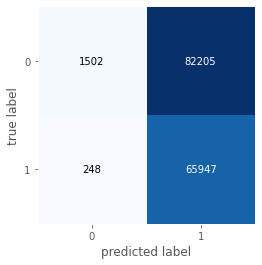

In [51]:
model = LGBMClassifier(**study.best_params, verbosity=-1)

# Treinando com o KFold para encontrar o threshold otimo
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
kf_scores = []
threshold_list = []

KFold_X = pd.DataFrame(X_train)
KFold_y = pd.DataFrame(y_train)

for idx, (train_index, val_index) in enumerate(kf.split(KFold_X, KFold_y)):
    KFold_X_train, KFold_X_val = KFold_X.values[train_index], KFold_X.values[val_index]
    KFold_y_train, KFold_y_val = KFold_y.values[train_index].ravel(), KFold_y.values[val_index].ravel()

    model.fit(KFold_X_train, KFold_y_train)

    preds = model.predict_proba(KFold_X_val)[:, 1]

    # Calcula as métricas para cada thresholds
    thresh, metric, _ = utils.metric_over_thresholds(
        evaluation_metrics, KFold_y_val, preds)

    # Salva os resultados das métricas por threshold de cada fold
    if idx == 0:
        threshold_list = thresh

    kf_scores.append(metric)

# Calcula a média das métricas de cada threshold, para todos os folds, e localiza a métrica ideal
metrics_mean = np.mean(kf_scores, axis=0)

# Inverte o array para calcular o argmax, para garantir que pegue o maior threshold com resultado ideal
thresh_idx = np.argmax(metrics_mean[::-1])
optimal_thresh = threshold_list[::-1][thresh_idx]

print('optimal threshold: ', optimal_thresh)


# Treinando o modelo de verdade
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:,1]
y_pred = utils.binarize(y_proba,optimal_thresh)

utils.report_and_cm(y_test,y_pred)


Visto o resultado, posso concluir que o f2 score não foi a métrica ideal para o problema proposto. O peso dado para o recall da classe 1 resultou em muitas amostras sendo classificadas como 1, e mesmo utilizando uma média harmonica, o resultado do precision baixo não foi suficiente para afetar o resultado final. Portanto, uma vez definido os objetivos e criadas as funções, posso repetir o processo, desta vez para o ROC AUC Score, e observar as diferenças entre os modelos propostos

In [54]:
# Instanciar metrica como função para poder alterar caso necessário
def evaluation_metrics(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

In [25]:
study_roc = optuna.create_study(direction="maximize", study_name="LGBM Classifier F1 Score")
def func(trial): return objective(trial, pd.DataFrame(X_train), pd.DataFrame(y_train))
study_roc.optimize(func, n_trials=10, timeout=1800)


[I 2022-02-21 12:48:39,804] A new study created in memory with name: LGBM Classifier F1 Score
[I 2022-02-21 12:48:53,523] Trial 0 finished with value: 0.6192145104932287 and parameters: {'n_estimators': 437, 'learning_rate': 0.23172992687858154, 'num_leaves': 2880, 'max_depth': 11, 'min_child_samples': 1600, 'reg_alpha': 85, 'reg_lambda': 60, 'min_split_gain': 7.075247491669362, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.44 optimal_mean 0.6192145104932287


[I 2022-02-21 12:49:03,730] Trial 1 finished with value: 0.6126553033275707 and parameters: {'n_estimators': 343, 'learning_rate': 0.2524154072562807, 'num_leaves': 280, 'max_depth': 10, 'min_child_samples': 5500, 'reg_alpha': 10, 'reg_lambda': 60, 'min_split_gain': 7.117072922605249, 'subsample': 0.2, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.46 optimal_mean 0.6126553033275707


[I 2022-02-21 12:49:16,293] Trial 2 finished with value: 0.618059173324009 and parameters: {'n_estimators': 344, 'learning_rate': 0.12485197614167991, 'num_leaves': 1740, 'max_depth': 11, 'min_child_samples': 3300, 'reg_alpha': 80, 'reg_lambda': 100, 'min_split_gain': 5.469218461200805, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.46 optimal_mean 0.618059173324009


[I 2022-02-21 12:49:26,604] Trial 3 finished with value: 0.6126320626343359 and parameters: {'n_estimators': 341, 'learning_rate': 0.20739020192209096, 'num_leaves': 160, 'max_depth': 8, 'min_child_samples': 5500, 'reg_alpha': 75, 'reg_lambda': 60, 'min_split_gain': 2.235602053529952, 'subsample': 0.2, 'subsample_freq': 1, 'colsample_bytree': 0.2}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.45 optimal_mean 0.6126320626343359


[I 2022-02-21 12:49:41,192] Trial 4 finished with value: 0.616906391925592 and parameters: {'n_estimators': 536, 'learning_rate': 0.12607828370787058, 'num_leaves': 1940, 'max_depth': 10, 'min_child_samples': 7900, 'reg_alpha': 10, 'reg_lambda': 45, 'min_split_gain': 6.953915147228426, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.47000000000000003 optimal_mean 0.616906391925592


[I 2022-02-21 12:50:02,502] Trial 5 finished with value: 0.6189656382195625 and parameters: {'n_estimators': 835, 'learning_rate': 0.2164103956228919, 'num_leaves': 1840, 'max_depth': 5, 'min_child_samples': 5300, 'reg_alpha': 5, 'reg_lambda': 15, 'min_split_gain': 0.5341264364456944, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.45 optimal_mean 0.6189656382195625


[I 2022-02-21 12:50:21,296] Trial 6 finished with value: 0.6154153196642993 and parameters: {'n_estimators': 681, 'learning_rate': 0.24466838350761325, 'num_leaves': 580, 'max_depth': 6, 'min_child_samples': 9200, 'reg_alpha': 15, 'reg_lambda': 0, 'min_split_gain': 3.02306003149761, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.48 optimal_mean 0.6154153196642993


[I 2022-02-21 12:50:32,669] Trial 7 finished with value: 0.6173069186838525 and parameters: {'n_estimators': 289, 'learning_rate': 0.06479100178134961, 'num_leaves': 2900, 'max_depth': 7, 'min_child_samples': 4100, 'reg_alpha': 75, 'reg_lambda': 55, 'min_split_gain': 10.589725680513144, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 0 with value: 0.6192145104932287.


optimal_thresh 0.45 optimal_mean 0.6173069186838525


[I 2022-02-21 12:50:45,263] Trial 8 finished with value: 0.6192978979209754 and parameters: {'n_estimators': 570, 'learning_rate': 0.2566682436311798, 'num_leaves': 1760, 'max_depth': 6, 'min_child_samples': 1100, 'reg_alpha': 5, 'reg_lambda': 45, 'min_split_gain': 3.4702843260118237, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 8 with value: 0.6192978979209754.


optimal_thresh 0.44 optimal_mean 0.6192978979209754


[I 2022-02-21 12:50:55,088] Trial 9 finished with value: 0.6170390852746959 and parameters: {'n_estimators': 179, 'learning_rate': 0.06516668252549448, 'num_leaves': 2300, 'max_depth': 10, 'min_child_samples': 4800, 'reg_alpha': 60, 'reg_lambda': 45, 'min_split_gain': 2.5964055258494643, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 8 with value: 0.6192978979209754.


optimal_thresh 0.44 optimal_mean 0.6170390852746959


optimal threshold:  0.44
              precision    recall  f1-score   support

           0       0.65      0.72      0.69     83707
           1       0.60      0.51      0.55     66195

    accuracy                           0.63    149902
   macro avg       0.62      0.62      0.62    149902
weighted avg       0.63      0.63      0.63    149902



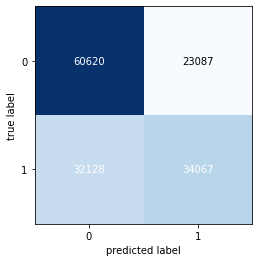

In [27]:
model = LGBMClassifier(**study_roc.best_params, verbosity=-1)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

_, _, optimal_threshold = utils.metric_over_thresholds(
    evaluation_metrics, y_test, y_proba)

print('optimal threshold: ', optimal_threshold)

y_pred = utils.binarize(y_proba, optimal_threshold)

utils.report_and_cm(y_test,y_pred)

O modelo parece, visualmente, se comportar melhor do que o outro modelo. Vamos então continuar a otimizar o modelo com o Optuna, e ver os resultados da otimização final

In [ ]:
study_roc.optimize(func, timeout=1800)

[I 2022-02-21 00:57:48,072] Trial 10 finished with value: 0.6192363968262593 and parameters: {'n_estimators': 935, 'learning_rate': 0.2799157336627743, 'num_leaves': 160, 'max_depth': 8, 'min_child_samples': 600, 'reg_alpha': 95, 'reg_lambda': 85, 'min_split_gain': 1.433549240425405, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 10 with value: 0.6192363968262593.


optimal_thresh 0.45 optimal_mean 0.6192363968262593


[I 2022-02-21 00:58:14,138] Trial 11 finished with value: 0.6197089379102204 and parameters: {'n_estimators': 949, 'learning_rate': 0.28282748873921776, 'num_leaves': 60, 'max_depth': 8, 'min_child_samples': 300, 'reg_alpha': 100, 'reg_lambda': 100, 'min_split_gain': 0.0061064349309889465, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.44 optimal_mean 0.6197089379102204


[I 2022-02-21 00:58:37,144] Trial 12 finished with value: 0.61919316263166 and parameters: {'n_estimators': 959, 'learning_rate': 0.2891439508656994, 'num_leaves': 60, 'max_depth': 7, 'min_child_samples': 200, 'reg_alpha': 100, 'reg_lambda': 100, 'min_split_gain': 0.35472913343794477, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.44 optimal_mean 0.61919316263166


[I 2022-02-21 00:59:01,182] Trial 13 finished with value: 0.6188183221562673 and parameters: {'n_estimators': 974, 'learning_rate': 0.2993260522252393, 'num_leaves': 200, 'max_depth': 8, 'min_child_samples': 3200, 'reg_alpha': 85, 'reg_lambda': 100, 'min_split_gain': 0.20548158468457406, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6188183221562673


[I 2022-02-21 00:59:16,390] Trial 14 finished with value: 0.6192279853946537 and parameters: {'n_estimators': 546, 'learning_rate': 0.2554741415339559, 'num_leaves': 540, 'max_depth': 8, 'min_child_samples': 1500, 'reg_alpha': 85, 'reg_lambda': 85, 'min_split_gain': 3.28072882090932, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.44 optimal_mean 0.6192279853946537


[I 2022-02-21 00:59:33,562] Trial 15 finished with value: 0.6175618315625239 and parameters: {'n_estimators': 645, 'learning_rate': 0.18396774515413603, 'num_leaves': 380, 'max_depth': 5, 'min_child_samples': 4600, 'reg_alpha': 85, 'reg_lambda': 85, 'min_split_gain': 3.1401002892530565, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6175618315625239


[I 2022-02-21 00:59:46,389] Trial 16 finished with value: 0.6193746092036758 and parameters: {'n_estimators': 460, 'learning_rate': 0.26105884473602337, 'num_leaves': 480, 'max_depth': 6, 'min_child_samples': 300, 'reg_alpha': 50, 'reg_lambda': 100, 'min_split_gain': 4.783944396452954, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6193746092036758


[I 2022-02-21 00:59:58,625] Trial 17 finished with value: 0.6192720049419745 and parameters: {'n_estimators': 422, 'learning_rate': 0.24512379930233863, 'num_leaves': 1140, 'max_depth': 6, 'min_child_samples': 2300, 'reg_alpha': 40, 'reg_lambda': 100, 'min_split_gain': 4.8136768510634935, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.44 optimal_mean 0.6192720049419745


[I 2022-02-21 01:00:11,989] Trial 18 finished with value: 0.6191435493130554 and parameters: {'n_estimators': 481, 'learning_rate': 0.099330324930374, 'num_leaves': 520, 'max_depth': 6, 'min_child_samples': 2500, 'reg_alpha': 50, 'reg_lambda': 35, 'min_split_gain': 5.353654521363243, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6191435493130554


[I 2022-02-21 01:00:20,895] Trial 19 finished with value: 0.6181356585275641 and parameters: {'n_estimators': 117, 'learning_rate': 0.18074714500639757, 'num_leaves': 20, 'max_depth': 9, 'min_child_samples': 3700, 'reg_alpha': 30, 'reg_lambda': 75, 'min_split_gain': 11.0968570035057, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.44 optimal_mean 0.6181356585275641


[I 2022-02-21 01:00:39,011] Trial 20 finished with value: 0.6167938286700119 and parameters: {'n_estimators': 710, 'learning_rate': 0.26571660432904104, 'num_leaves': 760, 'max_depth': 5, 'min_child_samples': 5200, 'reg_alpha': 55, 'reg_lambda': 90, 'min_split_gain': 4.649924022700647, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.2}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6167938286700119


[I 2022-02-21 01:00:51,343] Trial 21 finished with value: 0.6194867402550641 and parameters: {'n_estimators': 408, 'learning_rate': 0.2390654928222088, 'num_leaves': 1120, 'max_depth': 6, 'min_child_samples': 1600, 'reg_alpha': 40, 'reg_lambda': 100, 'min_split_gain': 4.744789145522473, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6194867402550641


[I 2022-02-21 01:01:03,624] Trial 22 finished with value: 0.6196022001618692 and parameters: {'n_estimators': 353, 'learning_rate': 0.2256528068055561, 'num_leaves': 420, 'max_depth': 6, 'min_child_samples': 1300, 'reg_alpha': 30, 'reg_lambda': 95, 'min_split_gain': 2.027758966243683, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.44 optimal_mean 0.6196022001618692


[I 2022-02-21 01:01:14,314] Trial 23 finished with value: 0.6196827038453873 and parameters: {'n_estimators': 250, 'learning_rate': 0.23333634595900082, 'num_leaves': 1280, 'max_depth': 5, 'min_child_samples': 1400, 'reg_alpha': 30, 'reg_lambda': 90, 'min_split_gain': 1.8071226558940041, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6196827038453873


[I 2022-02-21 01:01:25,385] Trial 24 finished with value: 0.6196448087547448 and parameters: {'n_estimators': 264, 'learning_rate': 0.17330894049598283, 'num_leaves': 2760, 'max_depth': 5, 'min_child_samples': 1100, 'reg_alpha': 25, 'reg_lambda': 90, 'min_split_gain': 1.7807569301018706, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6196448087547448


[I 2022-02-21 01:01:37,139] Trial 25 finished with value: 0.6194640313233455 and parameters: {'n_estimators': 270, 'learning_rate': 0.1824987807494269, 'num_leaves': 2720, 'max_depth': 4, 'min_child_samples': 2900, 'reg_alpha': 0, 'reg_lambda': 70, 'min_split_gain': 1.2204826183773227, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.6197089379102204.


optimal_thresh 0.45 optimal_mean 0.6194640313233455


[I 2022-02-21 01:01:49,563] Trial 26 finished with value: 0.6199788379244604 and parameters: {'n_estimators': 242, 'learning_rate': 0.19740733310945843, 'num_leaves': 2540, 'max_depth': 4, 'min_child_samples': 700, 'reg_alpha': 25, 'reg_lambda': 90, 'min_split_gain': 0.0722501555370949, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.6199788379244604


[I 2022-02-21 01:02:01,027] Trial 27 finished with value: 0.6192780527622979 and parameters: {'n_estimators': 247, 'learning_rate': 0.2055035191297977, 'num_leaves': 2360, 'max_depth': 4, 'min_child_samples': 800, 'reg_alpha': 30, 'reg_lambda': 75, 'min_split_gain': 0.34019269364816207, 'subsample': 0.30000000000000004, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.6192780527622979


[I 2022-02-21 01:02:09,387] Trial 28 finished with value: 0.6194477811796968 and parameters: {'n_estimators': 130, 'learning_rate': 0.27371207903033534, 'num_leaves': 1860, 'max_depth': 9, 'min_child_samples': 2100, 'reg_alpha': 35, 'reg_lambda': 15, 'min_split_gain': 3.589597236616832, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.44 optimal_mean 0.6194477811796968


[I 2022-02-21 01:02:22,639] Trial 29 finished with value: 0.6168251667261391 and parameters: {'n_estimators': 341, 'learning_rate': 0.23028599671539352, 'num_leaves': 2460, 'max_depth': 3, 'min_child_samples': 4500, 'reg_alpha': 20, 'reg_lambda': 50, 'min_split_gain': 2.727209320159318, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.30000000000000004}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.46 optimal_mean 0.6168251667261391


[I 2022-02-21 01:02:33,384] Trial 30 finished with value: 0.6161288345068228 and parameters: {'n_estimators': 187, 'learning_rate': 0.023757706367749765, 'num_leaves': 2840, 'max_depth': 3, 'min_child_samples': 3500, 'reg_alpha': 45, 'reg_lambda': 90, 'min_split_gain': 0.04102725426590489, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.30000000000000004}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.6161288345068228


[I 2022-02-21 01:02:44,289] Trial 31 finished with value: 0.6198748186882848 and parameters: {'n_estimators': 246, 'learning_rate': 0.1608101402129457, 'num_leaves': 3000, 'max_depth': 5, 'min_child_samples': 1100, 'reg_alpha': 20, 'reg_lambda': 90, 'min_split_gain': 1.8191174696394834, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.6198748186882848


[I 2022-02-21 01:02:55,474] Trial 32 finished with value: 0.6197397315148164 and parameters: {'n_estimators': 235, 'learning_rate': 0.1538700502733723, 'num_leaves': 2980, 'max_depth': 7, 'min_child_samples': 1700, 'reg_alpha': 15, 'reg_lambda': 80, 'min_split_gain': 1.3250227270080672, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.6197397315148164


[I 2022-02-21 01:03:05,686] Trial 33 finished with value: 0.6197272431510229 and parameters: {'n_estimators': 160, 'learning_rate': 0.11431486609812028, 'num_leaves': 2980, 'max_depth': 7, 'min_child_samples': 1900, 'reg_alpha': 10, 'reg_lambda': 80, 'min_split_gain': 1.106876522025089, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.44 optimal_mean 0.6197272431510229


[I 2022-02-21 01:03:15,901] Trial 34 finished with value: 0.6196267036020267 and parameters: {'n_estimators': 165, 'learning_rate': 0.12013230413017509, 'num_leaves': 2940, 'max_depth': 7, 'min_child_samples': 1900, 'reg_alpha': 10, 'reg_lambda': 80, 'min_split_gain': 1.1841128581286515, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.46 optimal_mean 0.6196267036020267


[I 2022-02-21 01:03:24,876] Trial 35 finished with value: 0.6194774763075896 and parameters: {'n_estimators': 100, 'learning_rate': 0.10778119324060756, 'num_leaves': 2580, 'max_depth': 7, 'min_child_samples': 2700, 'reg_alpha': 0, 'reg_lambda': 70, 'min_split_gain': 2.4299958276939577, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.6194774763075896


[I 2022-02-21 01:03:35,189] Trial 36 finished with value: 0.619492707660596 and parameters: {'n_estimators': 220, 'learning_rate': 0.15907328324140324, 'num_leaves': 3000, 'max_depth': 4, 'min_child_samples': 800, 'reg_alpha': 15, 'reg_lambda': 80, 'min_split_gain': 3.7290934431973457, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 26 with value: 0.6199788379244604.


optimal_thresh 0.45 optimal_mean 0.619492707660596


[I 2022-02-21 01:03:48,158] Trial 37 finished with value: 0.6200004891924227 and parameters: {'n_estimators': 308, 'learning_rate': 0.08289881549349493, 'num_leaves': 2540, 'max_depth': 9, 'min_child_samples': 1700, 'reg_alpha': 20, 'reg_lambda': 45, 'min_split_gain': 0.9907661362021679, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 37 with value: 0.6200004891924227.


optimal_thresh 0.45 optimal_mean 0.6200004891924227


[I 2022-02-21 01:03:59,958] Trial 38 finished with value: 0.6196090907979187 and parameters: {'n_estimators': 303, 'learning_rate': 0.0843612517011837, 'num_leaves': 2160, 'max_depth': 9, 'min_child_samples': 1100, 'reg_alpha': 20, 'reg_lambda': 45, 'min_split_gain': 6.022560462623222, 'subsample': 0.9, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 37 with value: 0.6200004891924227.


optimal_thresh 0.44 optimal_mean 0.6196090907979187


[I 2022-02-21 01:04:10,561] Trial 39 finished with value: 0.6185929469629149 and parameters: {'n_estimators': 219, 'learning_rate': 0.13354264587932144, 'num_leaves': 2600, 'max_depth': 10, 'min_child_samples': 5700, 'reg_alpha': 20, 'reg_lambda': 15, 'min_split_gain': 0.9743940895077121, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 37 with value: 0.6200004891924227.


optimal_thresh 0.45 optimal_mean 0.6185929469629149


[I 2022-02-21 01:04:21,209] Trial 40 finished with value: 0.6171745934496145 and parameters: {'n_estimators': 324, 'learning_rate': 0.1584313580447428, 'num_leaves': 1960, 'max_depth': 10, 'min_child_samples': 8500, 'reg_alpha': 5, 'reg_lambda': 55, 'min_split_gain': 2.4914067379135405, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 37 with value: 0.6200004891924227.


optimal_thresh 0.46 optimal_mean 0.6171745934496145


[I 2022-02-21 01:04:32,523] Trial 41 finished with value: 0.620002591187595 and parameters: {'n_estimators': 193, 'learning_rate': 0.08157095480957706, 'num_leaves': 2640, 'max_depth': 9, 'min_child_samples': 1800, 'reg_alpha': 10, 'reg_lambda': 40, 'min_split_gain': 0.9142967037565803, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 41 with value: 0.620002591187595.


optimal_thresh 0.45 optimal_mean 0.620002591187595


[I 2022-02-21 01:04:43,060] Trial 42 finished with value: 0.6191101130714867 and parameters: {'n_estimators': 196, 'learning_rate': 0.07504995988527913, 'num_leaves': 2540, 'max_depth': 9, 'min_child_samples': 2900, 'reg_alpha': 15, 'reg_lambda': 40, 'min_split_gain': 3.9877874377821345, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 41 with value: 0.620002591187595.


optimal_thresh 0.45 optimal_mean 0.6191101130714867


[I 2022-02-21 01:04:55,905] Trial 43 finished with value: 0.619984500652008 and parameters: {'n_estimators': 234, 'learning_rate': 0.049483810225661014, 'num_leaves': 2300, 'max_depth': 11, 'min_child_samples': 1800, 'reg_alpha': 25, 'reg_lambda': 25, 'min_split_gain': 0.8199294605329503, 'subsample': 0.8, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 41 with value: 0.620002591187595.


optimal_thresh 0.45 optimal_mean 0.619984500652008


[I 2022-02-21 01:05:12,062] Trial 44 finished with value: 0.6202304272181346 and parameters: {'n_estimators': 273, 'learning_rate': 0.027878771378677142, 'num_leaves': 2320, 'max_depth': 11, 'min_child_samples': 900, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 0.7231702687885911, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6202304272181346


[I 2022-02-21 01:05:27,870] Trial 45 finished with value: 0.6202187304372342 and parameters: {'n_estimators': 285, 'learning_rate': 0.03349871045530842, 'num_leaves': 2300, 'max_depth': 11, 'min_child_samples': 700, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 0.8557934356524266, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6202187304372342


[I 2022-02-21 01:05:41,744] Trial 46 finished with value: 0.6178455829684623 and parameters: {'n_estimators': 284, 'learning_rate': 0.014652542745613069, 'num_leaves': 1720, 'max_depth': 11, 'min_child_samples': 3300, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 12.341432703761305, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6178455829684623


[I 2022-02-21 01:05:54,354] Trial 47 finished with value: 0.6197570076029566 and parameters: {'n_estimators': 303, 'learning_rate': 0.04590214595886261, 'num_leaves': 2280, 'max_depth': 11, 'min_child_samples': 200, 'reg_alpha': 0, 'reg_lambda': 20, 'min_split_gain': 9.052920072165334, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6197570076029566


[I 2022-02-21 01:06:08,855] Trial 48 finished with value: 0.6183241313048172 and parameters: {'n_estimators': 392, 'learning_rate': 0.03642574176539073, 'num_leaves': 2100, 'max_depth': 12, 'min_child_samples': 4100, 'reg_alpha': 10, 'reg_lambda': 30, 'min_split_gain': 2.748602641489148, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6183241313048172


[I 2022-02-21 01:06:20,418] Trial 49 finished with value: 0.6195312170576222 and parameters: {'n_estimators': 176, 'learning_rate': 0.06194909270059333, 'num_leaves': 2380, 'max_depth': 12, 'min_child_samples': 2400, 'reg_alpha': 5, 'reg_lambda': 30, 'min_split_gain': 0.7695298764058576, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6195312170576222


[I 2022-02-21 01:06:33,568] Trial 50 finished with value: 0.6197018631286205 and parameters: {'n_estimators': 204, 'learning_rate': 0.028079578571580437, 'num_leaves': 1620, 'max_depth': 10, 'min_child_samples': 700, 'reg_alpha': 5, 'reg_lambda': 10, 'min_split_gain': 0.797032465576926, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6197018631286205


[I 2022-02-21 01:06:47,897] Trial 51 finished with value: 0.6200284374619267 and parameters: {'n_estimators': 277, 'learning_rate': 0.050583073987114216, 'num_leaves': 2680, 'max_depth': 11, 'min_child_samples': 600, 'reg_alpha': 25, 'reg_lambda': 40, 'min_split_gain': 0.6184486219172571, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6200284374619267


[I 2022-02-21 01:07:01,386] Trial 52 finished with value: 0.6198490676098716 and parameters: {'n_estimators': 281, 'learning_rate': 0.07187472786076271, 'num_leaves': 2700, 'max_depth': 11, 'min_child_samples': 1900, 'reg_alpha': 25, 'reg_lambda': 40, 'min_split_gain': 0.6779513965381461, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6198490676098716


[I 2022-02-21 01:07:15,030] Trial 53 finished with value: 0.6199968410671453 and parameters: {'n_estimators': 322, 'learning_rate': 0.04884120859520437, 'num_leaves': 2220, 'max_depth': 11, 'min_child_samples': 1400, 'reg_alpha': 10, 'reg_lambda': 25, 'min_split_gain': 2.2047629157986623, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6199968410671453


[I 2022-02-21 01:07:32,804] Trial 54 finished with value: 0.6193214421707506 and parameters: {'n_estimators': 324, 'learning_rate': 0.01139220565926246, 'num_leaves': 2000, 'max_depth': 12, 'min_child_samples': 500, 'reg_alpha': 15, 'reg_lambda': 35, 'min_split_gain': 2.0910852346243476, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6193214421707506


[I 2022-02-21 01:07:46,928] Trial 55 finished with value: 0.6196828665422466 and parameters: {'n_estimators': 386, 'learning_rate': 0.03755996968335614, 'num_leaves': 2440, 'max_depth': 10, 'min_child_samples': 1200, 'reg_alpha': 10, 'reg_lambda': 45, 'min_split_gain': 3.1327859781574325, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6196828665422466


[I 2022-02-21 01:08:00,751] Trial 56 finished with value: 0.6201334454541819 and parameters: {'n_estimators': 370, 'learning_rate': 0.09044954066349033, 'num_leaves': 2160, 'max_depth': 11, 'min_child_samples': 900, 'reg_alpha': 0, 'reg_lambda': 0, 'min_split_gain': 1.6097993910839659, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6201334454541819


[I 2022-02-21 01:08:15,968] Trial 57 finished with value: 0.6195471423041164 and parameters: {'n_estimators': 461, 'learning_rate': 0.09098792290148738, 'num_leaves': 2840, 'max_depth': 10, 'min_child_samples': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'min_split_gain': 7.621986055791698, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6195471423041164


[I 2022-02-21 01:08:33,884] Trial 58 finished with value: 0.6198293593060061 and parameters: {'n_estimators': 525, 'learning_rate': 0.06219918912853501, 'num_leaves': 2660, 'max_depth': 12, 'min_child_samples': 900, 'reg_alpha': 5, 'reg_lambda': 50, 'min_split_gain': 1.5773924110024178, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6198293593060061


[I 2022-02-21 01:08:50,191] Trial 59 finished with value: 0.6193847962761877 and parameters: {'n_estimators': 363, 'learning_rate': 0.07270861331806681, 'num_leaves': 2460, 'max_depth': 11, 'min_child_samples': 500, 'reg_alpha': 60, 'reg_lambda': 40, 'min_split_gain': 0.5238583738411666, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6193847962761877


[I 2022-02-21 01:09:03,273] Trial 60 finished with value: 0.6168752880639681 and parameters: {'n_estimators': 432, 'learning_rate': 0.08890180311573533, 'num_leaves': 2840, 'max_depth': 9, 'min_child_samples': 7200, 'reg_alpha': 0, 'reg_lambda': 55, 'min_split_gain': 2.9716551925188885, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6168752880639681


[I 2022-02-21 01:09:16,939] Trial 61 finished with value: 0.6200244888034083 and parameters: {'n_estimators': 318, 'learning_rate': 0.05508224728525977, 'num_leaves': 2200, 'max_depth': 11, 'min_child_samples': 1500, 'reg_alpha': 10, 'reg_lambda': 5, 'min_split_gain': 2.268966620755147, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6200244888034083


[I 2022-02-21 01:09:32,989] Trial 62 finished with value: 0.6198798892933817 and parameters: {'n_estimators': 371, 'learning_rate': 0.026900597487823273, 'num_leaves': 2140, 'max_depth': 12, 'min_child_samples': 1600, 'reg_alpha': 10, 'reg_lambda': 5, 'min_split_gain': 1.4353888554965137, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6198798892933817


[I 2022-02-21 01:09:45,030] Trial 63 finished with value: 0.6171954296741067 and parameters: {'n_estimators': 267, 'learning_rate': 0.06529693236776937, 'num_leaves': 1900, 'max_depth': 10, 'min_child_samples': 9900, 'reg_alpha': 15, 'reg_lambda': 10, 'min_split_gain': 1.8041705942489088, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6171954296741067


[I 2022-02-21 01:10:00,947] Trial 64 finished with value: 0.6200266243282291 and parameters: {'n_estimators': 299, 'learning_rate': 0.08011109824755014, 'num_leaves': 2040, 'max_depth': 11, 'min_child_samples': 2200, 'reg_alpha': 5, 'reg_lambda': 10, 'min_split_gain': 0.20675730484199617, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6200266243282291


[I 2022-02-21 01:10:13,945] Trial 65 finished with value: 0.619694807514509 and parameters: {'n_estimators': 217, 'learning_rate': 0.10119476580353677, 'num_leaves': 2020, 'max_depth': 11, 'min_child_samples': 2200, 'reg_alpha': 5, 'reg_lambda': 0, 'min_split_gain': 0.2815877854958633, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.619694807514509


[I 2022-02-21 01:10:26,197] Trial 66 finished with value: 0.6198759406420362 and parameters: {'n_estimators': 265, 'learning_rate': 0.05521027860712979, 'num_leaves': 1440, 'max_depth': 11, 'min_child_samples': 1000, 'reg_alpha': 0, 'reg_lambda': 5, 'min_split_gain': 4.184307476192021, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6198759406420362


[I 2022-02-21 01:10:42,470] Trial 67 finished with value: 0.6200470510957207 and parameters: {'n_estimators': 343, 'learning_rate': 0.03744349146999434, 'num_leaves': 2220, 'max_depth': 11, 'min_child_samples': 600, 'reg_alpha': 75, 'reg_lambda': 10, 'min_split_gain': 0.035662687926319214, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6200470510957207


[I 2022-02-21 01:10:58,381] Trial 68 finished with value: 0.6197147922007882 and parameters: {'n_estimators': 341, 'learning_rate': 0.04031652579228955, 'num_leaves': 1760, 'max_depth': 11, 'min_child_samples': 500, 'reg_alpha': 75, 'reg_lambda': 10, 'min_split_gain': 0.13054793944785392, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6197147922007882


[I 2022-02-21 01:11:14,506] Trial 69 finished with value: 0.6189692582026745 and parameters: {'n_estimators': 289, 'learning_rate': 0.019420122440376116, 'num_leaves': 2220, 'max_depth': 12, 'min_child_samples': 1300, 'reg_alpha': 90, 'reg_lambda': 15, 'min_split_gain': 1.4456308635890327, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6189692582026745


[I 2022-02-21 01:11:29,790] Trial 70 finished with value: 0.6190622757071227 and parameters: {'n_estimators': 423, 'learning_rate': 0.03521965087402492, 'num_leaves': 2340, 'max_depth': 12, 'min_child_samples': 800, 'reg_alpha': 65, 'reg_lambda': 5, 'min_split_gain': 8.270653373778206, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6190622757071227


[I 2022-02-21 01:11:43,564] Trial 71 finished with value: 0.6196794121514795 and parameters: {'n_estimators': 335, 'learning_rate': 0.053849690542565866, 'num_leaves': 2080, 'max_depth': 10, 'min_child_samples': 1400, 'reg_alpha': 75, 'reg_lambda': 20, 'min_split_gain': 0.35762064599054705, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6196794121514795


[I 2022-02-21 01:11:59,350] Trial 72 finished with value: 0.6201022343587195 and parameters: {'n_estimators': 355, 'learning_rate': 0.07765569446612346, 'num_leaves': 2440, 'max_depth': 11, 'min_child_samples': 500, 'reg_alpha': 10, 'reg_lambda': 20, 'min_split_gain': 0.5912309925729782, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.44 optimal_mean 0.6201022343587195


[I 2022-02-21 01:12:13,186] Trial 73 finished with value: 0.6198304327016612 and parameters: {'n_estimators': 351, 'learning_rate': 0.043628805743606267, 'num_leaves': 2180, 'max_depth': 11, 'min_child_samples': 500, 'reg_alpha': 5, 'reg_lambda': 20, 'min_split_gain': 6.780072219690517, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6198304327016612


[I 2022-02-21 01:12:27,062] Trial 74 finished with value: 0.6201164417659198 and parameters: {'n_estimators': 370, 'learning_rate': 0.09563599502343065, 'num_leaves': 2460, 'max_depth': 11, 'min_child_samples': 1000, 'reg_alpha': 0, 'reg_lambda': 15, 'min_split_gain': 2.2647130776527002, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6201164417659198


[I 2022-02-21 01:12:48,616] Trial 75 finished with value: 0.6199823105590125 and parameters: {'n_estimators': 507, 'learning_rate': 0.12738715667359718, 'num_leaves': 2380, 'max_depth': 10, 'min_child_samples': 200, 'reg_alpha': 0, 'reg_lambda': 15, 'min_split_gain': 0.5251753219260044, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.6199823105590125


[I 2022-02-21 01:13:05,532] Trial 76 finished with value: 0.6192483278320028 and parameters: {'n_estimators': 571, 'learning_rate': 0.09511853023803868, 'num_leaves': 2460, 'max_depth': 11, 'min_child_samples': 1000, 'reg_alpha': 35, 'reg_lambda': 10, 'min_split_gain': 1.3625184290218382, 'subsample': 0.30000000000000004, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.46 optimal_mean 0.6192483278320028


[I 2022-02-21 01:13:20,319] Trial 77 finished with value: 0.619875715429542 and parameters: {'n_estimators': 392, 'learning_rate': 0.10404713842763381, 'num_leaves': 2760, 'max_depth': 12, 'min_child_samples': 500, 'reg_alpha': 5, 'reg_lambda': 20, 'min_split_gain': 1.8536678848911166, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.6202304272181346.


optimal_thresh 0.45 optimal_mean 0.619875715429542


[I 2022-02-21 01:13:37,617] Trial 78 finished with value: 0.6203899879292437 and parameters: {'n_estimators': 293, 'learning_rate': 0.06826366612964055, 'num_leaves': 2280, 'max_depth': 10, 'min_child_samples': 700, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 0.043846520391750854, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6203899879292437


[I 2022-02-21 01:14:01,518] Trial 79 finished with value: 0.620218388783415 and parameters: {'n_estimators': 454, 'learning_rate': 0.03118273453954112, 'num_leaves': 2300, 'max_depth': 10, 'min_child_samples': 700, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 0.067160299703653, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.620218388783415


[I 2022-02-21 01:14:22,418] Trial 80 finished with value: 0.6201526607640124 and parameters: {'n_estimators': 574, 'learning_rate': 0.03226161000899015, 'num_leaves': 2300, 'max_depth': 10, 'min_child_samples': 900, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 1.1065996792420463, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6201526607640124


[I 2022-02-21 01:14:57,264] Trial 81 finished with value: 0.6201312617189932 and parameters: {'n_estimators': 750, 'learning_rate': 0.02766687322535431, 'num_leaves': 2280, 'max_depth': 10, 'min_child_samples': 900, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 0.0564642595037458, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6201312617189932


[I 2022-02-21 01:15:27,056] Trial 82 finished with value: 0.620266172818271 and parameters: {'n_estimators': 834, 'learning_rate': 0.01924076022325859, 'num_leaves': 2300, 'max_depth': 10, 'min_child_samples': 1000, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 1.1267821346125833, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.620266172818271


[I 2022-02-21 01:15:57,110] Trial 83 finished with value: 0.6198533032898097 and parameters: {'n_estimators': 844, 'learning_rate': 0.029467326983278495, 'num_leaves': 2300, 'max_depth': 10, 'min_child_samples': 1100, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 1.0752543558215348, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6198533032898097


[I 2022-02-21 01:16:23,164] Trial 84 finished with value: 0.6198796537136422 and parameters: {'n_estimators': 850, 'learning_rate': 0.023023017101159487, 'num_leaves': 1940, 'max_depth': 10, 'min_child_samples': 900, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 1.4983909846544696, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.44 optimal_mean 0.6198796537136422


[I 2022-02-21 01:16:47,399] Trial 85 finished with value: 0.6201748309564226 and parameters: {'n_estimators': 710, 'learning_rate': 0.023045679725990573, 'num_leaves': 2500, 'max_depth': 10, 'min_child_samples': 1200, 'reg_alpha': 0, 'reg_lambda': 35, 'min_split_gain': 1.1085527736357461, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6201748309564226


[I 2022-02-21 01:17:18,321] Trial 86 finished with value: 0.619403675493142 and parameters: {'n_estimators': 703, 'learning_rate': 0.010344651831115409, 'num_leaves': 2120, 'max_depth': 9, 'min_child_samples': 1500, 'reg_alpha': 0, 'reg_lambda': 35, 'min_split_gain': 1.104919912255425, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.619403675493142


[I 2022-02-21 01:17:40,166] Trial 87 finished with value: 0.6199269815574937 and parameters: {'n_estimators': 633, 'learning_rate': 0.019021635783955514, 'num_leaves': 2540, 'max_depth': 8, 'min_child_samples': 1200, 'reg_alpha': 5, 'reg_lambda': 30, 'min_split_gain': 1.571051339074989, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6199269815574937


[I 2022-02-21 01:18:02,733] Trial 88 finished with value: 0.6198347150748443 and parameters: {'n_estimators': 816, 'learning_rate': 0.03160056760566542, 'num_leaves': 2360, 'max_depth': 10, 'min_child_samples': 800, 'reg_alpha': 0, 'reg_lambda': 35, 'min_split_gain': 2.624390813489044, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.44 optimal_mean 0.6198347150748443


[I 2022-02-21 01:18:28,328] Trial 89 finished with value: 0.6195863321367805 and parameters: {'n_estimators': 764, 'learning_rate': 0.018543376302643542, 'num_leaves': 1820, 'max_depth': 10, 'min_child_samples': 2000, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 0.9164471327593121, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6195863321367805


[I 2022-02-21 01:18:45,480] Trial 90 finished with value: 0.6195511084778739 and parameters: {'n_estimators': 586, 'learning_rate': 0.041778137777505824, 'num_leaves': 2280, 'max_depth': 10, 'min_child_samples': 200, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 9.564199497699953, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6195511084778739


[I 2022-02-21 01:19:14,424] Trial 91 finished with value: 0.6203040479580926 and parameters: {'n_estimators': 682, 'learning_rate': 0.03133949918651169, 'num_leaves': 2500, 'max_depth': 10, 'min_child_samples': 1300, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 0.041249438761163715, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6203040479580926


[I 2022-02-21 01:19:43,658] Trial 92 finished with value: 0.6196976217649921 and parameters: {'n_estimators': 704, 'learning_rate': 0.030707981694858413, 'num_leaves': 2400, 'max_depth': 9, 'min_child_samples': 1300, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 0.4788337969996997, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6196976217649921


[I 2022-02-21 01:20:14,564] Trial 93 finished with value: 0.620153772932196 and parameters: {'n_estimators': 764, 'learning_rate': 0.023261046030410175, 'num_leaves': 2520, 'max_depth': 9, 'min_child_samples': 800, 'reg_alpha': 5, 'reg_lambda': 35, 'min_split_gain': 0.0015752111012654613, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.620153772932196


[I 2022-02-21 01:20:34,637] Trial 94 finished with value: 0.6193355948141421 and parameters: {'n_estimators': 629, 'learning_rate': 0.015695875450815397, 'num_leaves': 2600, 'max_depth': 9, 'min_child_samples': 1600, 'reg_alpha': 5, 'reg_lambda': 35, 'min_split_gain': 13.563553047360406, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6193355948141421


[I 2022-02-21 01:21:00,602] Trial 95 finished with value: 0.6199488819915141 and parameters: {'n_estimators': 896, 'learning_rate': 0.02262125981217755, 'num_leaves': 2500, 'max_depth': 8, 'min_child_samples': 400, 'reg_alpha': 10, 'reg_lambda': 25, 'min_split_gain': 1.2243239470535536, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6199488819915141


[I 2022-02-21 01:21:22,964] Trial 96 finished with value: 0.6189103638046373 and parameters: {'n_estimators': 676, 'learning_rate': 0.06859785494610611, 'num_leaves': 2620, 'max_depth': 10, 'min_child_samples': 2600, 'reg_alpha': 15, 'reg_lambda': 35, 'min_split_gain': 0.7784917183110694, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6189103638046373


[I 2022-02-21 01:21:43,405] Trial 97 finished with value: 0.6196027626380853 and parameters: {'n_estimators': 588, 'learning_rate': 0.04597620407543576, 'num_leaves': 2340, 'max_depth': 10, 'min_child_samples': 1200, 'reg_alpha': 5, 'reg_lambda': 20, 'min_split_gain': 1.9202376180802025, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.44 optimal_mean 0.6196027626380853


[I 2022-02-21 01:22:06,375] Trial 98 finished with value: 0.6178520293879982 and parameters: {'n_estimators': 787, 'learning_rate': 0.05793224600053304, 'num_leaves': 2520, 'max_depth': 9, 'min_child_samples': 6300, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 0.5278325705852164, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6178520293879982


[I 2022-02-21 01:22:36,770] Trial 99 finished with value: 0.6200862392396094 and parameters: {'n_estimators': 733, 'learning_rate': 0.03489419047255158, 'num_leaves': 2780, 'max_depth': 10, 'min_child_samples': 700, 'reg_alpha': 5, 'reg_lambda': 30, 'min_split_gain': 0.015091124519571952, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6200862392396094


[I 2022-02-21 01:23:06,157] Trial 100 finished with value: 0.6195476183720998 and parameters: {'n_estimators': 883, 'learning_rate': 0.012299133607560327, 'num_leaves': 2140, 'max_depth': 9, 'min_child_samples': 1800, 'reg_alpha': 10, 'reg_lambda': 20, 'min_split_gain': 1.0002711939069093, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.44 optimal_mean 0.6195476183720998


[I 2022-02-21 01:23:35,490] Trial 101 finished with value: 0.6200500733207823 and parameters: {'n_estimators': 758, 'learning_rate': 0.024435308470244277, 'num_leaves': 2280, 'max_depth': 10, 'min_child_samples': 800, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 0.35337129219285446, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6200500733207823


[I 2022-02-21 01:24:14,466] Trial 102 finished with value: 0.6201785529588663 and parameters: {'n_estimators': 982, 'learning_rate': 0.030514903909702868, 'num_leaves': 960, 'max_depth': 10, 'min_child_samples': 900, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 0.06855874838424633, 'subsample': 0.6000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6201785529588663


[I 2022-02-21 01:24:50,325] Trial 103 finished with value: 0.6201544052808688 and parameters: {'n_estimators': 796, 'learning_rate': 0.04088216451719588, 'num_leaves': 1200, 'max_depth': 10, 'min_child_samples': 300, 'reg_alpha': 0, 'reg_lambda': 25, 'min_split_gain': 0.6990824776202658, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6201544052808688


[I 2022-02-21 01:25:26,880] Trial 104 finished with value: 0.6200539830791182 and parameters: {'n_estimators': 972, 'learning_rate': 0.043115433758286074, 'num_leaves': 880, 'max_depth': 10, 'min_child_samples': 400, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 0.7621766152532512, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6200539830791182


[I 2022-02-21 01:26:05,667] Trial 105 finished with value: 0.6200354363417578 and parameters: {'n_estimators': 929, 'learning_rate': 0.0315639442601411, 'num_leaves': 1100, 'max_depth': 9, 'min_child_samples': 300, 'reg_alpha': 0, 'reg_lambda': 30, 'min_split_gain': 0.3612813195076033, 'subsample': 0.4, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6200354363417578


[I 2022-02-21 01:26:36,966] Trial 106 finished with value: 0.61992685153603 and parameters: {'n_estimators': 671, 'learning_rate': 0.022068368635774185, 'num_leaves': 1260, 'max_depth': 10, 'min_child_samples': 700, 'reg_alpha': 10, 'reg_lambda': 35, 'min_split_gain': 1.2271763127545603, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.61992685153603


[I 2022-02-21 01:27:09,122] Trial 107 finished with value: 0.6173958229858544 and parameters: {'n_estimators': 822, 'learning_rate': 0.015944551002226845, 'num_leaves': 940, 'max_depth': 9, 'min_child_samples': 8300, 'reg_alpha': 5, 'reg_lambda': 25, 'min_split_gain': 0.717761885779802, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.6000000000000001}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.46 optimal_mean 0.6173958229858544


[I 2022-02-21 01:27:43,372] Trial 108 finished with value: 0.6200603337929523 and parameters: {'n_estimators': 803, 'learning_rate': 0.04795039402523989, 'num_leaves': 620, 'max_depth': 10, 'min_child_samples': 1100, 'reg_alpha': 15, 'reg_lambda': 40, 'min_split_gain': 0.27181289371618667, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.5}. Best is trial 78 with value: 0.6203899879292437.


optimal_thresh 0.45 optimal_mean 0.6200603337929523


In [ ]:
pickle.dump(study_roc, open('datasets/optunaStudyROCAUC.pkl', 'wb'))

In [55]:
study_roc = pickle.load(open('datasets/optunaStudyROCAUC.pkl', 'rb'))


In [49]:
study_roc.best_params

{'n_estimators': 293,
 'learning_rate': 0.06826366612964055,
 'num_leaves': 2280,
 'max_depth': 10,
 'min_child_samples': 700,
 'reg_alpha': 0,
 'reg_lambda': 25,
 'min_split_gain': 0.043846520391750854,
 'subsample': 0.7,
 'subsample_freq': 1,
 'colsample_bytree': 0.6000000000000001}

In [30]:
utils.optuna_plots(study_roc)

optimal threshold:  0.45
              precision    recall  f1-score   support

           0       0.65      0.75      0.70     83707
           1       0.61      0.49      0.54     66195

    accuracy                           0.64    149902
   macro avg       0.63      0.62      0.62    149902
weighted avg       0.63      0.64      0.63    149902



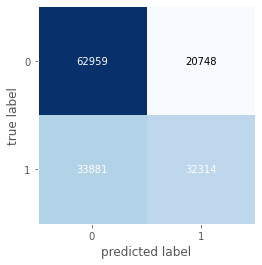

In [57]:
model = LGBMClassifier(**study_roc.best_params, verbosity=-1)

# Treinando com o KFold para encontrar o threshold otimo
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
kf_scores = []
threshold_list = []

KFold_X = pd.DataFrame(X_train)
KFold_y = pd.DataFrame(y_train)

for idx, (train_index, val_index) in enumerate(kf.split(KFold_X, KFold_y)):
    KFold_X_train, KFold_X_val = KFold_X.values[train_index], KFold_X.values[val_index]
    KFold_y_train, KFold_y_val = KFold_y.values[train_index].ravel(
    ), KFold_y.values[val_index].ravel()

    model.fit(KFold_X_train, KFold_y_train)

    preds = model.predict_proba(KFold_X_val)[:, 1]

    # Calcula as métricas para cada thresholds
    thresh, metric, _ = utils.metric_over_thresholds(
        evaluation_metrics, KFold_y_val, preds)

    # Salva os resultados das métricas por threshold de cada fold
    if idx == 0:
        threshold_list = thresh

    kf_scores.append(metric)

# Calcula a média das métricas de cada threshold, para todos os folds, e localiza a métrica ideal
metrics_mean = np.mean(kf_scores, axis=0)

# Inverte o array para calcular o argmax, para garantir que pegue o maior threshold com resultado ideal
thresh_idx = np.argmax(metrics_mean[::-1])
optimal_thresh = threshold_list[::-1][thresh_idx]

print('optimal threshold: ', optimal_thresh)


# Treinando o modelo de verdade
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]
y_pred = utils.binarize(y_proba, optimal_thresh)

utils.report_and_cm(y_test, y_pred)


Embora tenhamos muito mais pessoas classificadas incorretamente como Classe 0 nesse novo mdoelo, podemos observar que há uma melhora nesse modelo quanto à predição aleatória

In [59]:
# Salvando a informação de threshold ótimo
pickle.dump(optimal_thresh, open('datasets/optunaStudyROCAUCThreshold.pkl','wb'))

# Treinando o Modelo Final e prevendo

Para o modelo final, selecionei o da curva ROC AUC, pois o modelo 1 prevê 98,8% de casos confirmados de covid

In [9]:
import pandas as pd
import numpy as np
import pickle
from libs import utils
from lightgbm import LGBMClassifier


In [21]:
study_roc = pickle.load(open('datasets/optunaStudyROCAUC.pkl', 'rb'))
optimal_threshold = pickle.load(open('datasets/optunaStudyROCAUCThreshold.pkl', 'rb'))
df_train = pd.read_pickle('./datasets/dfCovid.pkl')
df_pred = pd.read_csv('./datasets/COVID_subm.csv')


In [22]:
# Faz os tratamentos de dados para o df_pred
df_pred['contact_other_covid_unknown'] = np.where(df_pred['contact_other_covid'].isna(), 1.0, 0.0)

df_pred.fillna(0,inplace=True)

df_pred = df_pred[df_pred['age'] < 115]
df_pred = df_pred[((df_pred['pregnancy'] == 1) & (df_pred['age'] < 70) & (
    df_pred['age'] > 8)) | (df_pred['pregnancy'] == 0)]


In [23]:
target = 'covid_res'
features = df_train.columns.drop(target)

X_train = df_train[features]
y_train = df_train[target]

X_pred = df_pred[features]

In [25]:
model = LGBMClassifier(**study_roc.best_params, verbosity=-1)
model.fit(X, y)

y_proba = model.predict_proba(X_pred)[:, 1]


y_pred = utils.binarize(y_proba, optimal_threshold)

In [28]:
pickle.dump(y_pred,open('finalModelPredictions.pkl','wb'))

# Conclusão

Ao fim desse projeto, testei 3 modelos (XGBoost, LightGBM e RandomForest) e otimizei 2 vezes o LightGBM, com métricas diferentes. Vou me referir aos modelos otimizados pelos seguintes nomes:

- **Modelo 1**: LightGBM otimizado pelo Optuna para a métrica do F2_Score da Classe 1
(datasets/optunaStudyF2Score.pkl)
- **Modelo 2**: LightGBM otimizado pelo Optuna para a métrica do ROC AUC Score
(datasets/optunaStudyROCAUC.pkl)

Embora sabemos que o objetivo do problema é determinar resultados de teste de covid a partir das features, é dificil precisar a métrica ideal para a solução do problema, dado que não sabemos a finalidade.

Podemos dizer que é um governo que quer acabar de vez com a pandemia e evitar que o covid se espalhe. Para tal, eu diria que métricas que priorizam o recall da classe 1 (como o F2 Score), seriam melhores. Podemos tambem dizer que é um hospital, querendo priorizar pacientes. Para tal, uma métrica como o ROC AUC, que fornece melhor separação entre as classes, poderia performar melhor.


#### Modelo 1
Vemos que, ao tentar otimizar demais o recall da classe 1, o modelo chegou a conclusão de que era melhor classificar 98,8% dos pacientes como tendo COVID, um problema que tentei evitar ao não otimizar somente o recall da classe 1, mas sim dar um peso para ele através do F2 Score.

A partir do modelo proposto, baseando na suposição de que a finalidade do modelo é erradicar a covid, a recomendação seria algo parecido com o que os governos tentaram fazer, lockdown, pois nao há uma maneira facil de detectar com alto recall quais pessoas estão realmente infectadas sem classificar quase 99% delas como infectadas.


#### Modelo 2
Ao contrário do Modelo 1, otimizar o ROC AUC deu um pouco mais de peso para a classe 0, pois era a classe dominante no problema (embora não houvesse um Class Imbalance gigante, a classe 0 representava cerca de 56% dos dados).

Embora o recall da classe 1 tenha ficado quase que igual ao resultado aleatório, podemos dizer que o modelo faria sentido para um hospital priorizar. Vemos que temos um precision de 0.65 para a classe 0, e um precision de 0.61 para a classe 1, ou seja, uma melhora siginificativa quanto ao modelo aleatório. Dizer, a partir do teste preliminar que alguem não tem covid nos da 65% de confiança (melhor que nada), e dizer que alguem tem covid nos da 61% de confiança (tambem melhor que nada), ajudando assim a priorizar pacientes.


#### Trabalhos futuros

Acredito que eu poderia também ter tentado os seguintes passos para melhorar os resultados:
- Utilizar alguma técnica de rebalanceamento de classes (SMOTE, Undersampling) para ajustar o balanceamento (embora o modelo não esteja muito desbalanceado);
- Remover algumas features e retreinar os modelos; Aqui, eu escolheria os seguintes critérios (a priori): 
  - Remover features que podem apresentar dados incorretos, como "fumante" ou "teve contato com outras pessoas com covid". São perguntas cujas respostas podem estar incorretas, pois pessoas tem definições diferentes sobre o que classifica elas como fumantes, e tambem podem mentir sobre ambas as perguntas, sem termos como auferir as respostas;
  - Remover features que podem representar algo que ocorre após o teste de covid, como a internação e a intubação;
- Selecionar outras features do dataset original; Entendo que, na maioria dos casos, as features que me foram dadas são essas e tenho que trabalhar com elas. Especificamente para esse projeto, alguns colegas encontraram o dataset original, que continha mais colunas. Talvez analisar outras colunas poderia produzir um resultado melhor
